## This is a customer classification project. 
### The goal is to develop a machine learning model to predict whether customer will agree to subscribe to a term deposit or not based on customer data 

### Explotratory data analysis

In [482]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
# Loading the dataset 
data = pd.read_csv('BankCustomerData.csv')
data
data_base = data
data_null = data

In [483]:
# View descriptive statistics of numberical data 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [485]:
# Check for Null values 
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [486]:
# Check for duplicates 
data.duplicated().sum()

0

In [487]:
len(data.columns)

17

### Since our data has no Null values and no Duplicates we can move on and get better knowledge about each feature

In [488]:
# creating a function to see distribution of all features 
def plot_distributions(df):
    plt.figure(figsize=(28,40))
    b = 0 
    for i in df.columns:
        b+=1
        plt.subplot(6,6,b)
        plt.hist(df[i])
        plt.title(i)
        
# create function to visualize distribution of one feature 
def plot_idividual( column_name,df= data):
    plt.figure(figsize=(15,10))
    plt.hist(df[column_name])
    plt.title(column_name)
        



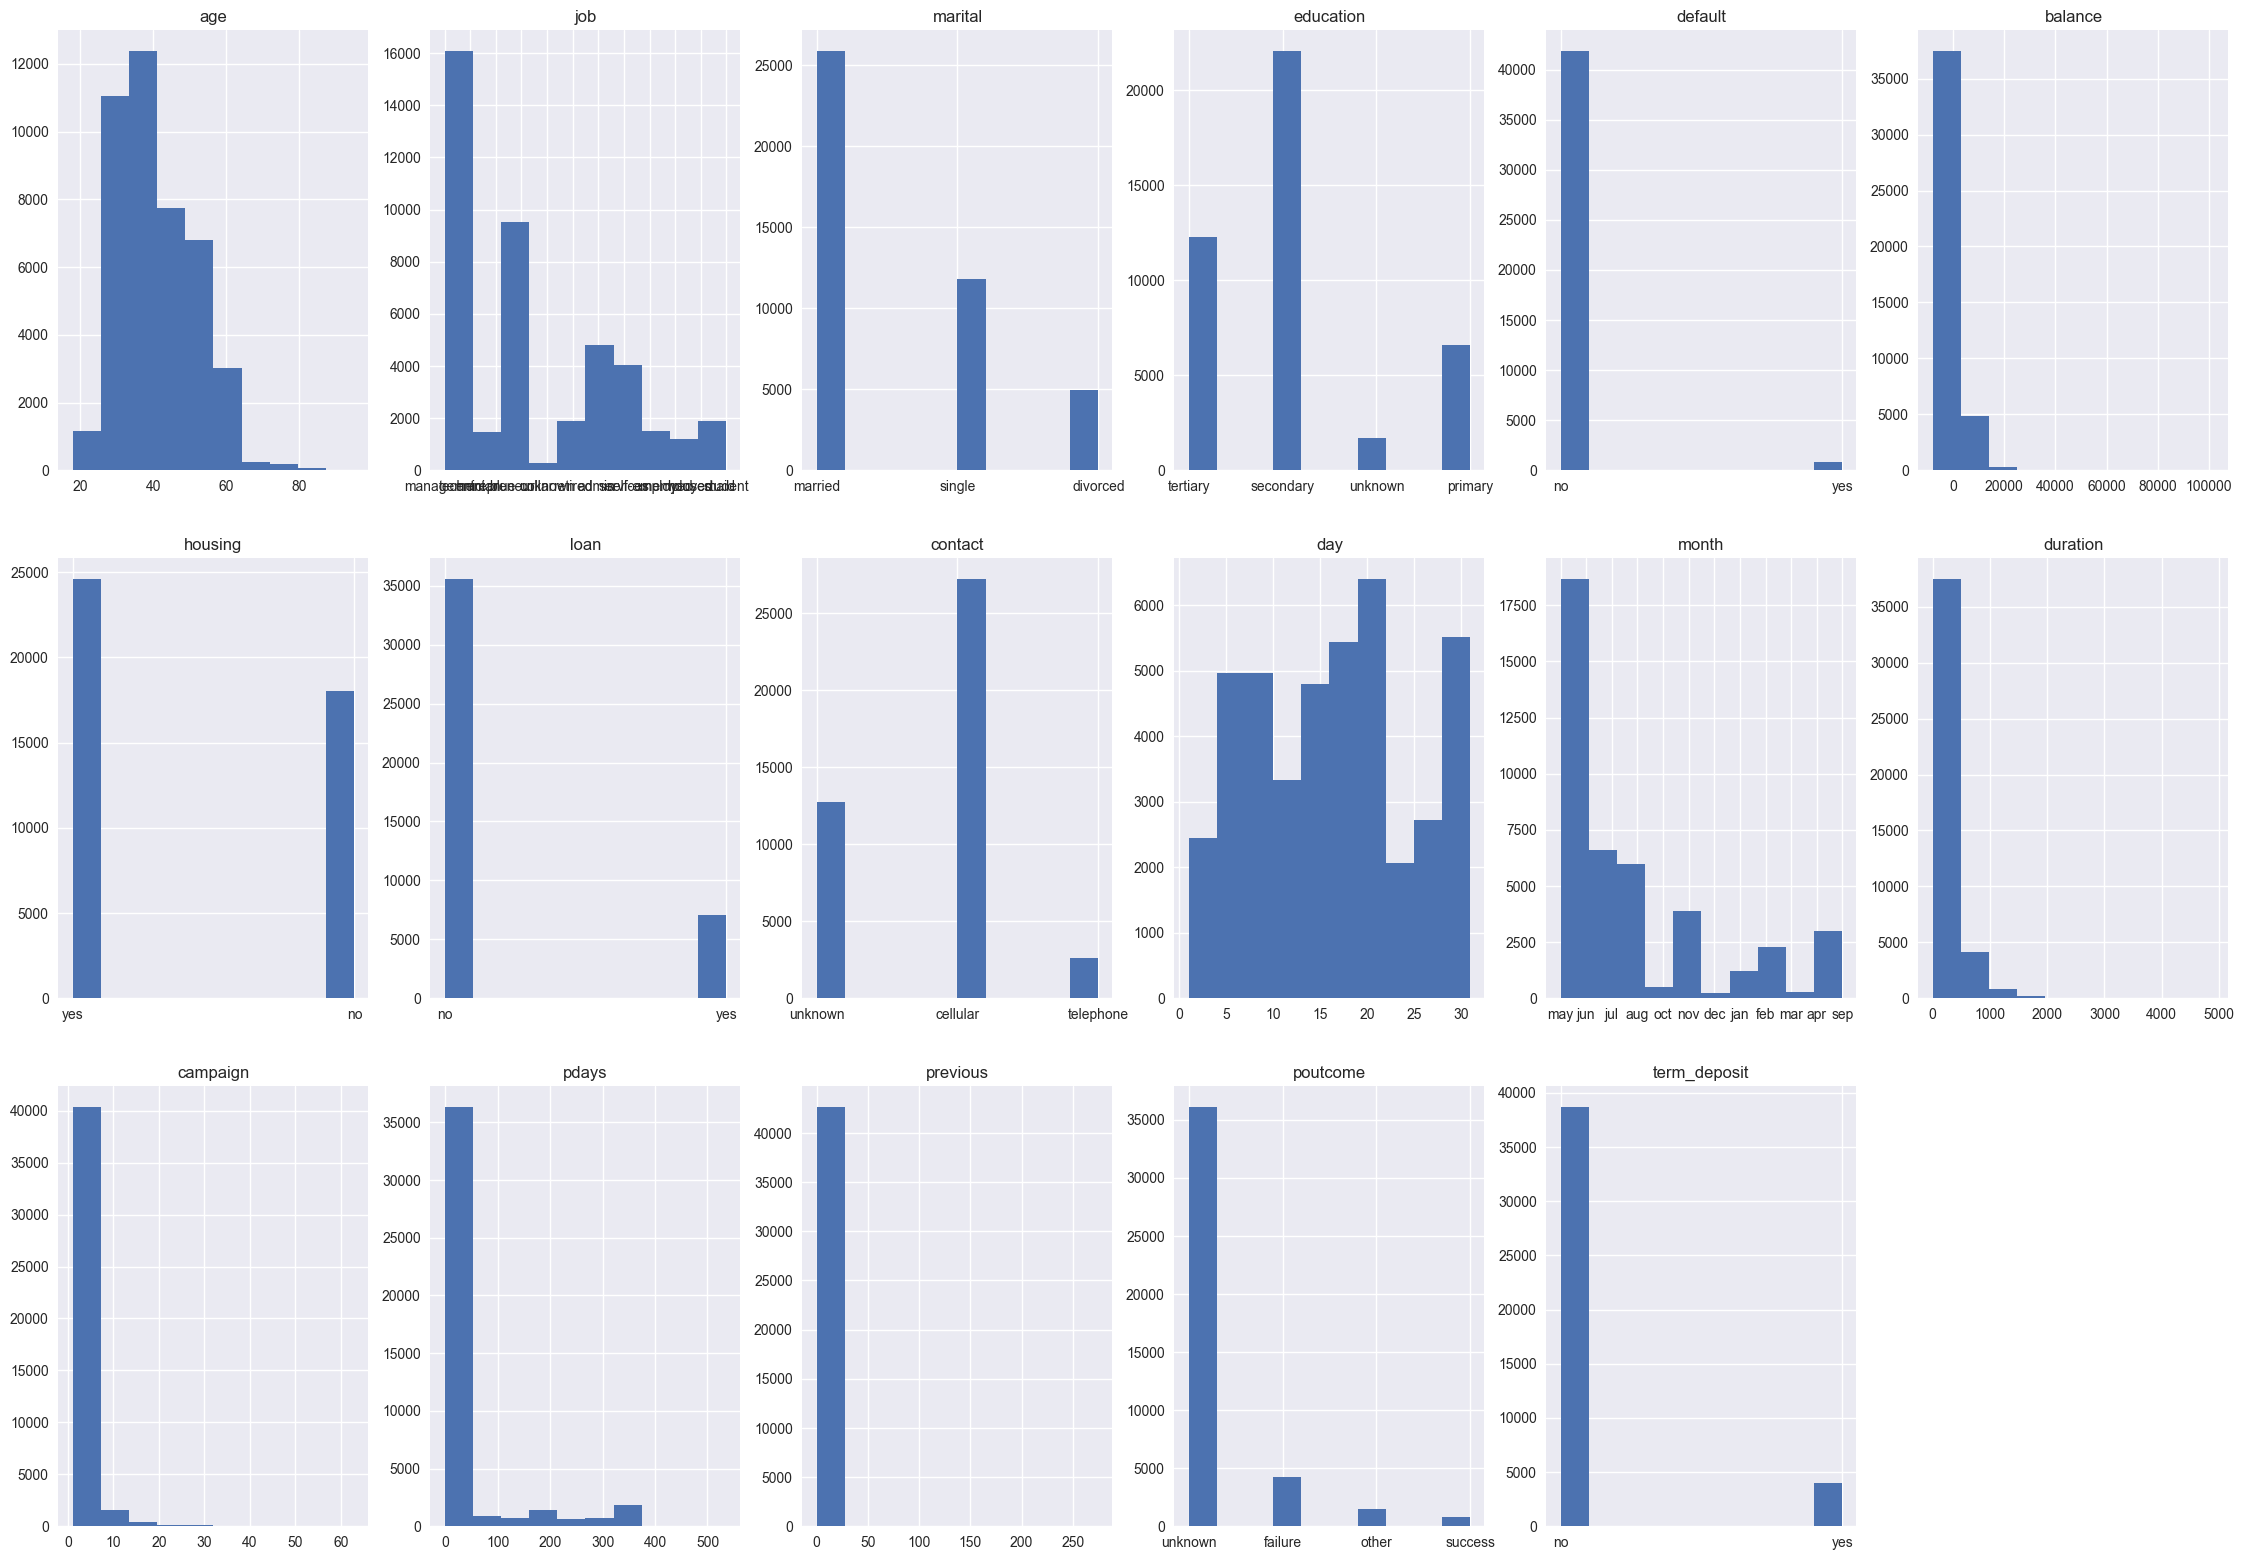

In [489]:
# Plot distibutio of features 
plot_distributions(data)

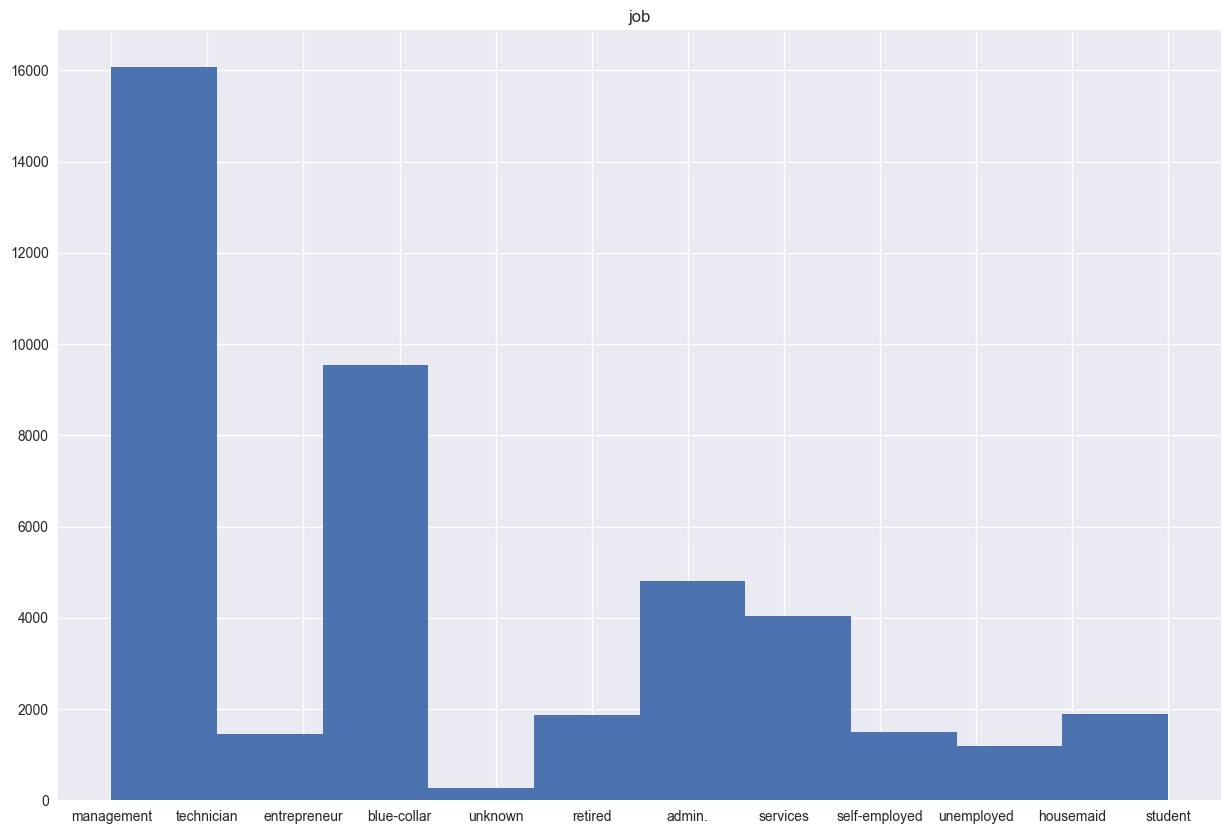

In [490]:
# Plot job feature to see it in more details 
plot_idividual('job')

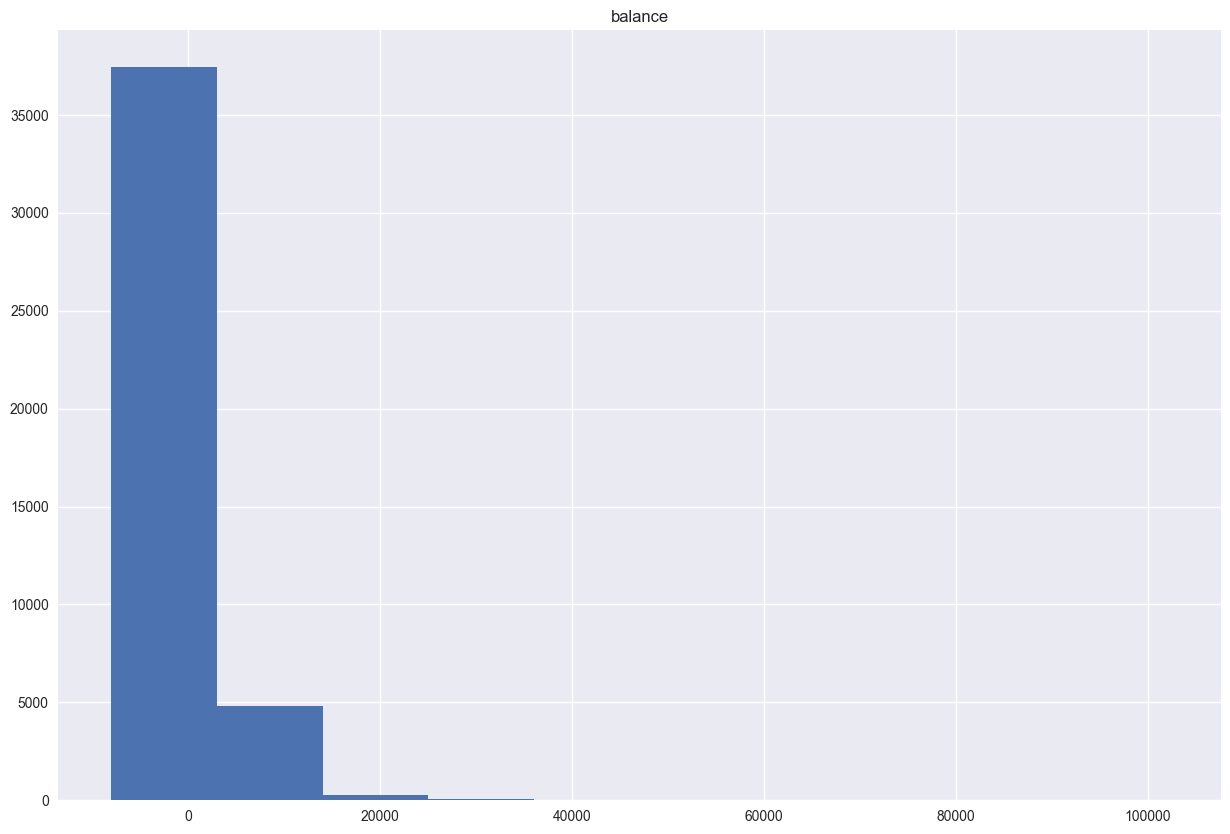

In [491]:
# plot balance to see it in more details 
plot_idividual('balance')

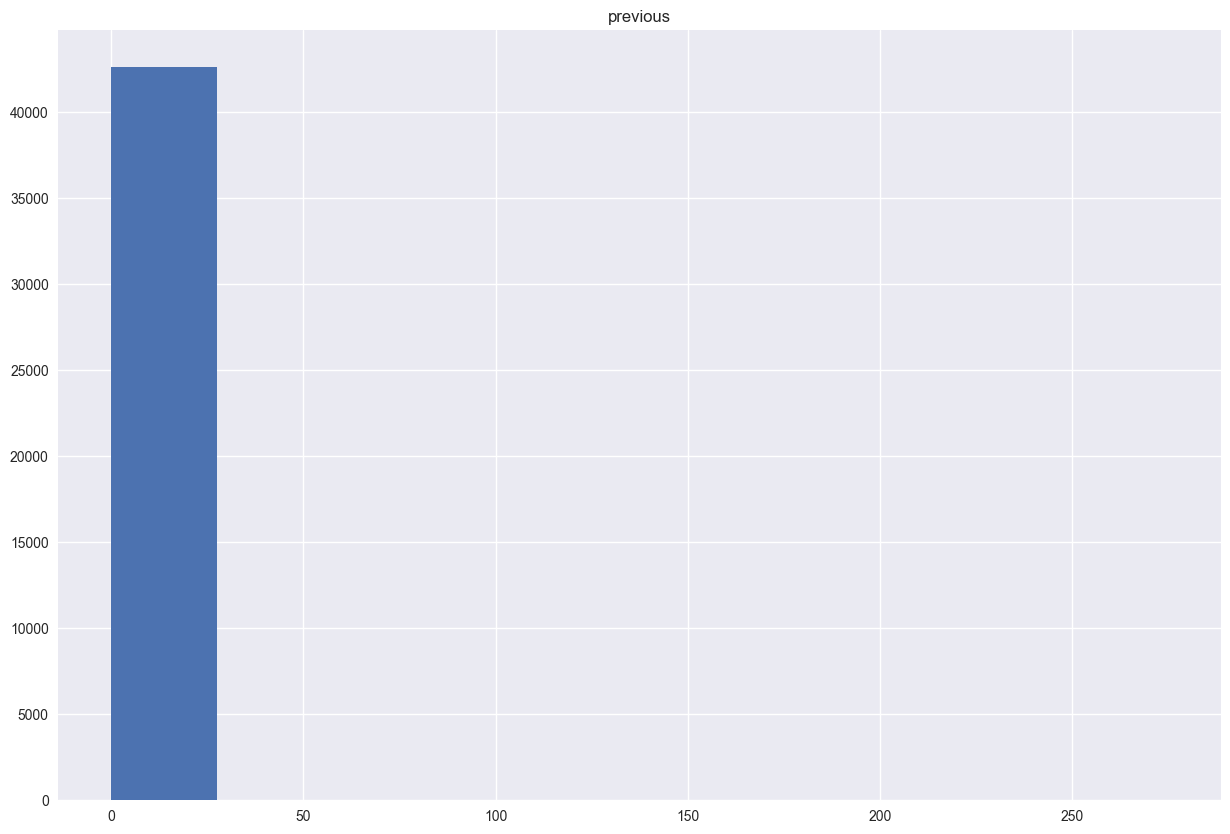

In [492]:
plot_idividual('previous')

In [493]:
data['previous'].describe()

count    42639.000000
mean         0.465442
std          2.166705
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [494]:

data[data['previous'] > 15]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
24295,35,technician,divorced,tertiary,no,1718,yes,yes,cellular,17,nov,74,1,167,16,other,no
24596,56,management,single,primary,no,109,no,yes,telephone,17,nov,124,1,129,18,other,no
24624,57,technician,married,secondary,no,1158,no,no,unknown,17,nov,204,2,109,21,other,no
26657,39,management,divorced,tertiary,no,155,yes,no,cellular,20,nov,20,6,153,26,failure,no
26668,51,entrepreneur,married,secondary,no,653,yes,no,cellular,20,nov,16,9,112,37,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42336,35,technician,married,secondary,no,4922,yes,no,cellular,17,nov,393,4,201,17,other,yes
42422,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,95,37,other,no
42497,29,student,single,secondary,no,459,no,no,cellular,15,dec,279,3,189,19,other,yes
42536,40,admin.,single,secondary,no,782,yes,no,cellular,21,dec,94,5,202,17,failure,no


In [495]:
# Get count of each value in term_deposit
term_deposit = np.array([len(data[data['term_deposit']== 'no']), len(data[data['term_deposit'] == 'yes'])])
mylabel = ['no','yes']
# Get precentage of each value 
myprec = np.array([str(round(term_deposit[0] / len(data['term_deposit']),2)) + '%', 
                    str(round(term_deposit[1] / len(data['term_deposit']),2)) + '%'])



Text(0.5, 1.0, 'Term deposit results')

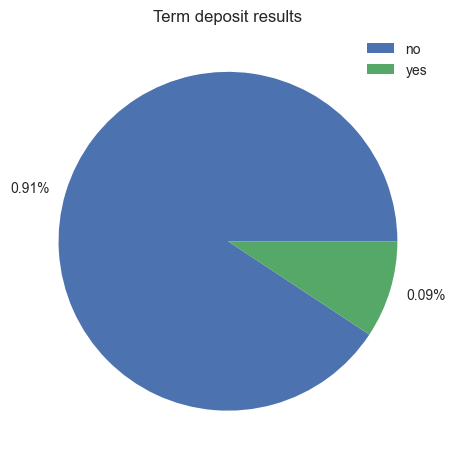

In [496]:
# Visualize yes & no distribution

plt.pie(term_deposit, labels = myprec)
plt.legend(mylabel)
plt.title('Term deposit results')


## From this histograms we can understand two things 
* ### Prediction label is not equely represented (90/10), which can lead to bad model performance 
* ### Labels : balance, duration, pdays, previous , campaign are higly skewed , which can also result in poor model performance 

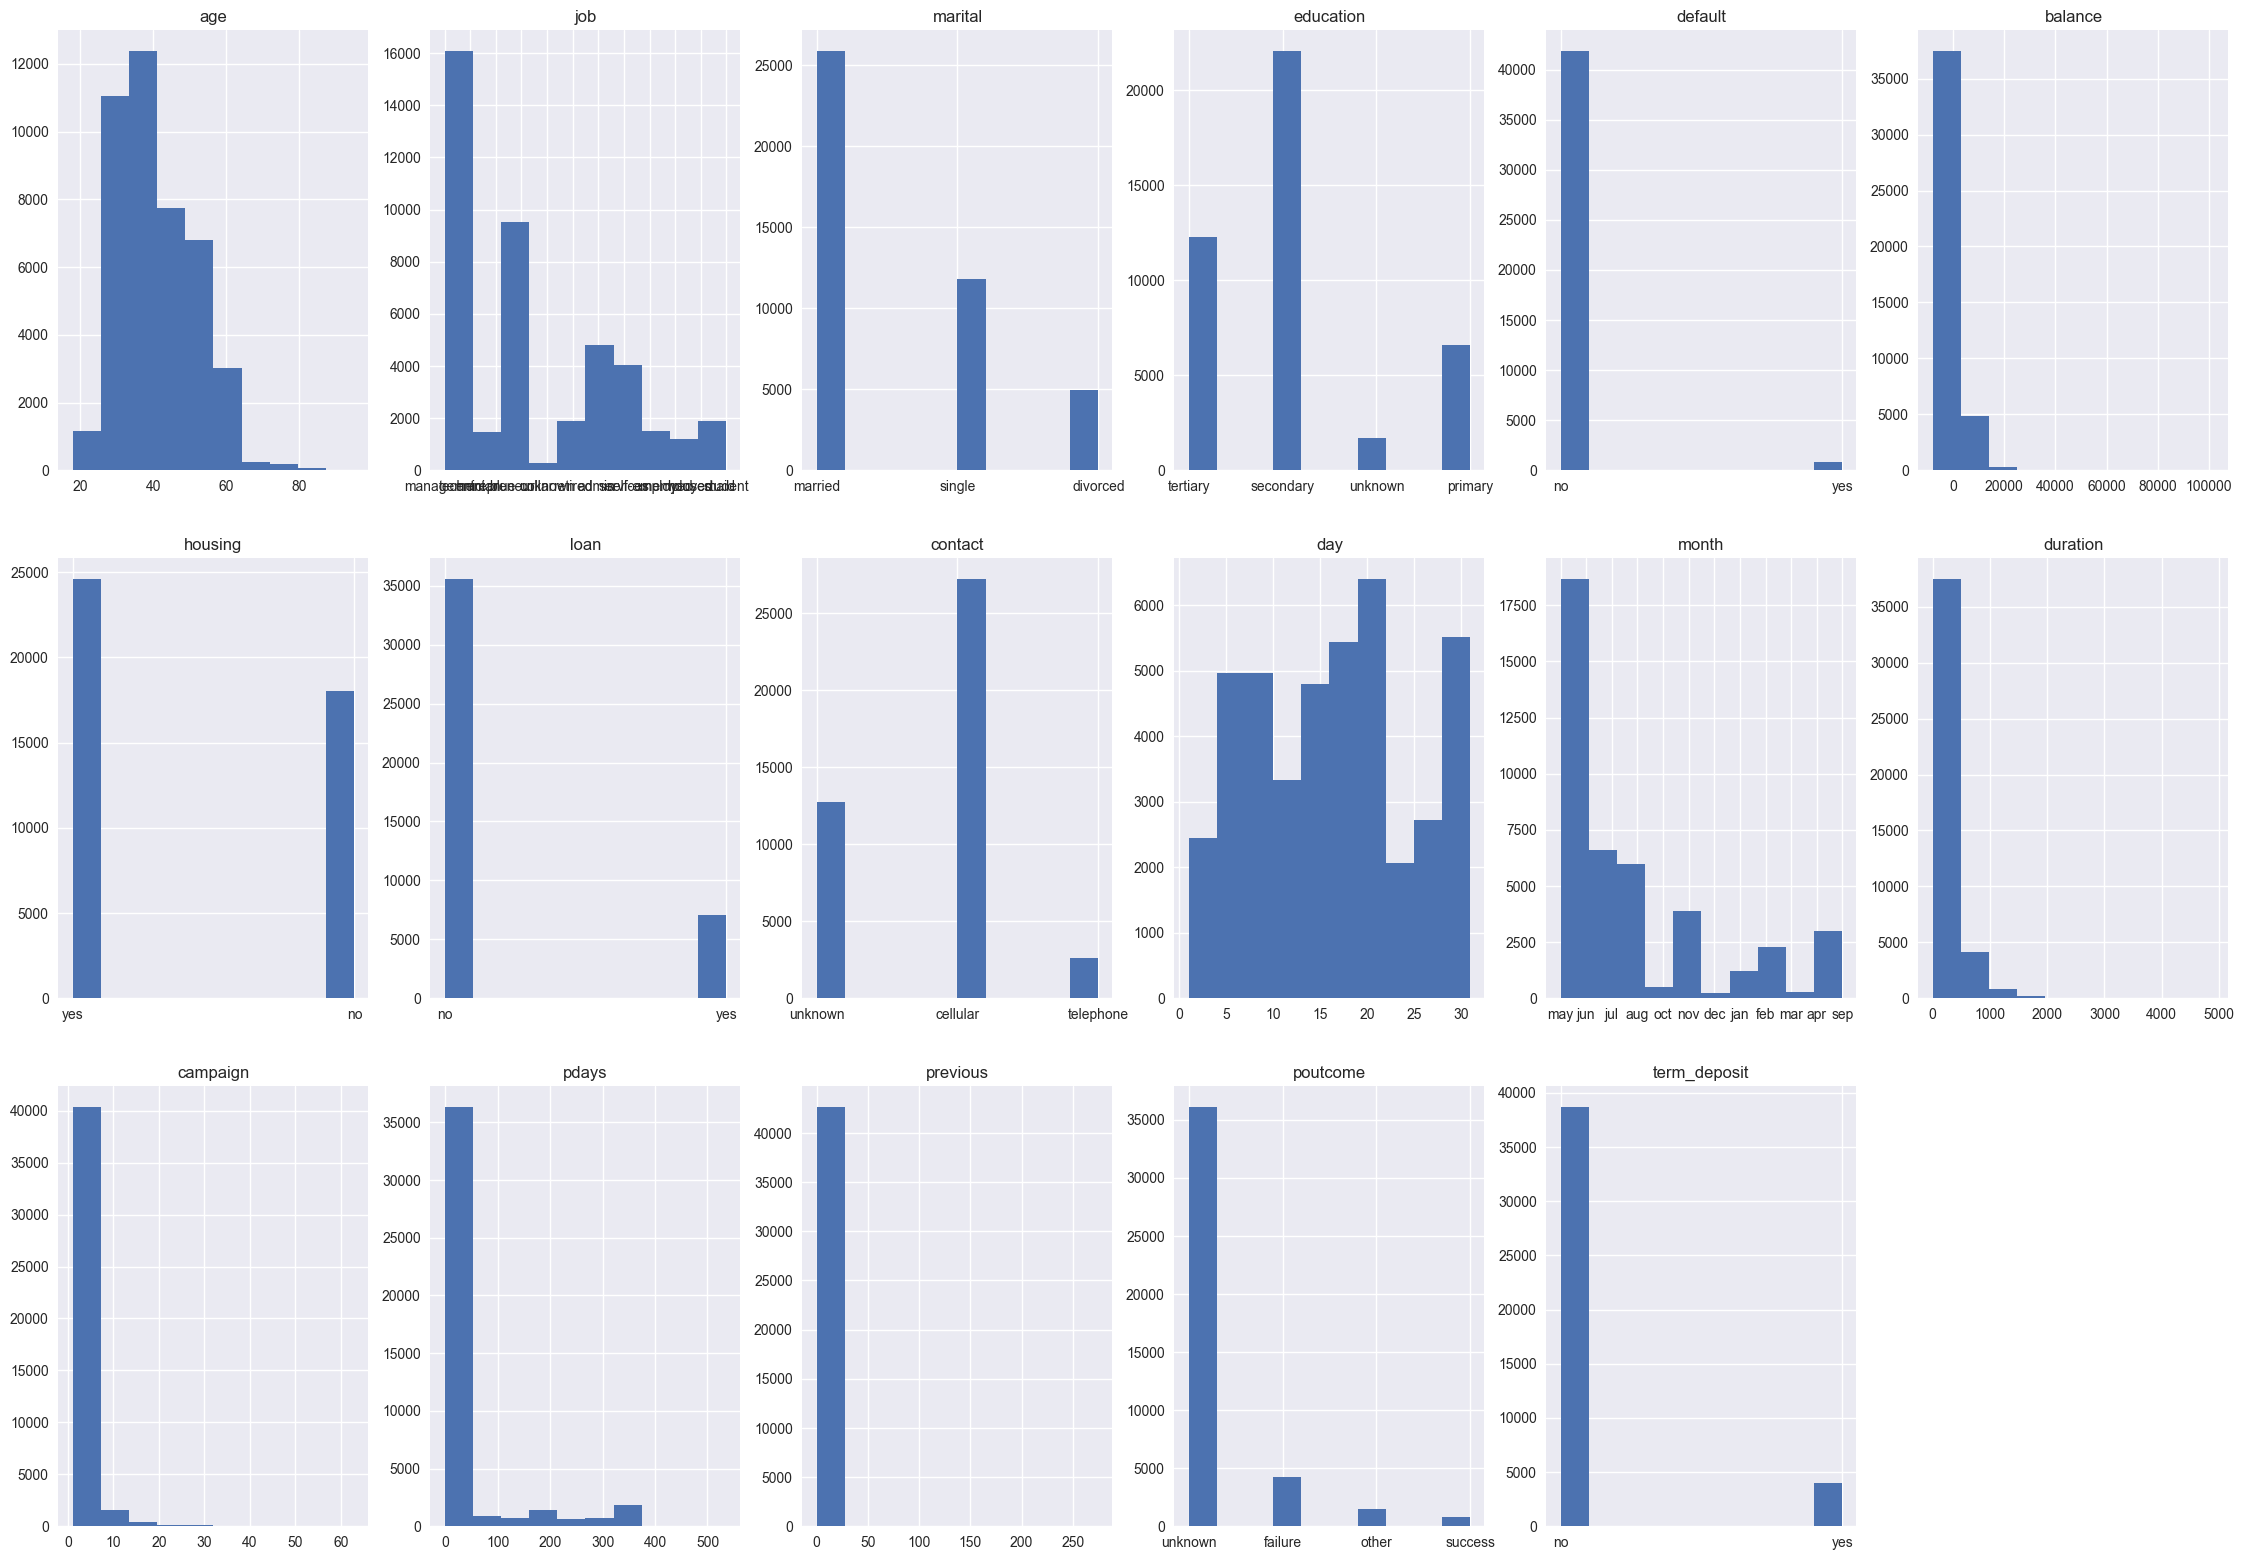

In [497]:
plot_distributions(data)

## Data preprocessing 

In [498]:
y = pd.get_dummies(data['term_deposit'])['yes']


In [499]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split

# Shuffle the data
data_shuffled =  data.sample(frac=1, random_state = 42).reset_index(drop = True)

# Create X, y values 
X = data_shuffled.drop(['term_deposit','duration'], axis = 1 )
y = pd.get_dummies(data['term_deposit'])['yes']


def scale(X,y):
    # Create a column transformer 
    ct = make_column_transformer(
        (MinMaxScaler(),['age','day']), # Transforms data in values between 0 and 1
        (RobustScaler(), ['balance','campaign','pdays', 'previous']), # We use RobustScalar because we assume high level of outliers because of higly skewed data. It works with quartiles 
        (OneHotEncoder(),['job','marital','education','default','housing','loan','contact','month','poutcome']) # incode categorical data 
    )

    

    # Split the data in train and test sets 
    X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

    # Fit column transformer 
    ct.fit(X_train)

    # Transform the data
    X_train_transformed = pd.DataFrame(ct.transform(X_train)) 
    X_test_transformed  = pd.DataFrame(ct.transform(X_test))
    return  X_train_transformed,  X_test_transformed, y_train, y_test  

    


In [500]:

X_train_transformed, X_test_transformed , y_train, y_test  = scale(X,y)

In [501]:
cor = X_train_transformed.corr()
cor.style.background_gradient(cmap = 'coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,-0.013587,0.091056,0.010334,-0.043648,-0.018036,-0.052061,-0.042076,0.021812,0.086542,-0.013402,0.404100,-0.002076,-0.064175,-0.179288,-0.064088,0.003929,0.048888,0.160841,0.276775,-0.417103,0.185227,-0.098760,-0.071468,0.076153,0.017656,-0.017656,0.186398,-0.186398,0.011777,-0.011777,-0.068977,0.153437,-0.008733,-0.032060,0.085876,0.021784,-0.011809,-0.019935,0.008117,0.060853,0.002182,-0.133079,0.036609,0.073600,0.035577,-0.016013,-0.030034,-0.007016,0.031375
1,-0.013587,1.000000,-0.000126,0.168250,-0.099509,-0.056795,-0.006128,-0.020301,-0.003165,0.002452,0.016933,-0.013675,0.001605,-0.005876,-0.016840,0.033315,-0.010240,-0.008976,0.000738,0.003931,-0.004819,-0.025110,-0.003615,0.022880,0.002581,-0.006781,0.006781,0.032751,-0.032751,-0.009385,0.009385,0.024729,0.027925,-0.040704,0.044911,0.039789,-0.013588,-0.296862,0.253088,0.153829,-0.210962,-0.011233,-0.031296,0.100633,0.036304,-0.049635,-0.068500,-0.038422,-0.024722,0.085847
2,0.091056,-0.000126,1.000000,-0.017204,-0.008540,0.005924,-0.023993,-0.045321,0.014234,-0.004452,0.066889,0.034454,0.020057,-0.035888,0.002094,-0.016176,0.012275,0.013331,-0.026969,0.025106,-0.008126,-0.015480,-0.066928,0.081902,0.010054,0.067995,-0.067995,0.065310,-0.065310,0.081936,-0.081936,0.017445,0.030015,-0.034166,0.012815,0.016728,0.029060,-0.008700,-0.029044,-0.067606,0.030157,0.016006,-0.069287,0.120050,0.045177,0.022433,0.008998,-0.000603,0.018404,-0.013972
3,0.010334,0.168250,-0.017204,1.000000,-0.079676,-0.028169,-0.024477,-0.000294,0.000156,0.000468,0.021854,-0.023961,0.003699,-0.005084,-0.017748,0.021983,-0.018084,0.020898,-0.017090,0.031879,-0.022581,0.001943,-0.021609,0.018847,0.008017,-0.014788,0.014788,0.038941,-0.038941,-0.005541,0.005541,-0.024389,0.057581,-0.004847,-0.073742,0.158330,-0.014945,-0.026018,-0.064717,0.108512,0.037081,-0.005195,-0.077843,-0.091405,-0.048255,-0.029458,-0.087173,-0.016020,-0.044471,0.097120
4,-0.043648,-0.099509,-0.008540,-0.079676,1.000000,0.567989,0.028878,0.045789,-0.009768,-0.031080,-0.021944,-0.033469,-0.011022,0.013541,0.004458,-0.009069,-0.018155,-0.022442,0.004753,-0.022167,0.020799,-0.002971,0.034556,-0.027983,-0.018052,0.025453,-0.025453,-0.179528,0.179528,0.011822,-0.011822,0.231078,0.010698,-0.248085,0.157089,-0.114075,0.054415,0.059333,0.052183,-0.155872,-0.121141,-0.016559,0.128534,0.025631,0.030835,0.022154,0.743319,0.411915,0.178906,-0.895905
5,-0.018036,-0.056795,0.005924,-0.028169,0.567989,1.000000,0.017027,0.001948,-0.005768,-0.017984,0.008717,-0.024362,-0.002118,-0.000675,0.011197,0.004984,-0.014152,-0.014515,0.006356,-0.014628,0.011424,-0.013472,0.012431,0.003755,-0.015589,0.014038,-0.014038,-0.095389,0.095389,0.001631,-0.001631,0.151488,0.032279,-0.175992,0.079396,-0.071161,0.050282,0.062698,0.060622,-0.111733,-0.077760,-0.007851,0.038009,0.070743,0.027779,0.033857,0.455716,0.382121,0.171163,-0.638790
6,-0.052061,-0.006128,-0.023993,-0.024477,0.028878,0.017027,1.000000,-0.191871,-0.066666,-0.059573,-0.182283,-0.076682,-0.068119,-0.115292,-0.046298,-0.160975,-0.060426,-0.028053,0.036398,-0.064079,0.043926,-0.110036,0.218512,-0.148006,-0.013129,0.010344,-0.010344,-0.045324,0.045324,-0.028720,0.028720,-0.003600,-0.008247,0.008135,0.027623,-0.076328,-0.000798,-0.002813,0.008155,0.013362,-0.003526,0.020536,0.030529,-0.004578,0.002567,0.008013,0.020375,0.010284,0.017008,-0.028517
7,-0.042076,-0.020301,-0.045321,-0.000294,0.045789,0.001948,-0.191871,1.000000,-0.100687,-0.089974,-0.275306,-0.115814,-0.102881,-0.174128,-0.069925,-0.243124,-0.091262,-0.042368,-0.062369,0.123708,-0.090449,0.351338,0.033025,-0.324694,0.019194,-0.008389,0.008389,-0.165933,0.165933,-0.016458,0.016458,-0.122854,0.000446,0.128654,0.024832,-0.122404,-0.029672,-0.034242,-0.031881,-0.012354,0.016987,-0.033389,0.159903,-0.049155,-0.039199,-0.034912,0.011999,0.013666,-0.032480,-0.004993
8,0.021812,-0.003165,0.014234

### Removing higly corelated columns


In [502]:
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.220779,0.566667,-0.326792,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.350649,0.133333,-0.171321,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.779221,0.566667,-0.207547,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.480519,0.533333,-0.318491,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.532468,0.200000,-0.425660,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34106,0.454545,0.666667,1.405283,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34107,0.077922,0.100000,-0.206038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34108,0.415584,0.266667,0.859623,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34109,0.311688,0.866667,-0.656604,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [503]:
X_train_trans_remov = X_train_transformed.drop([26,28,30,33,49], axis = 1)
X_test_trans_remov = X_test_transformed.drop([26,28,30,33,49], axis = 1)

### Model 1 (Nearal Network)

In [504]:
import tensorflow as tf 

In [505]:
y_train

8695     0
9122     0
22836    0
36463    0
27364    0
        ..
5701     0
42314    1
2270     0
26519    0
36399    0
Name: yes, Length: 34111, dtype: uint8

In [506]:
# set a randome seed 
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation ='relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#Fit the model
history = model_1.fit(X_train_transformed,
                    y_train,
                    epochs = 10,
                    validation_data = (X_test_transformed,y_test))



Epoch 1/10
1066/1066 [==============================] - 3s 2ms/step - loss: 0.3265 - accuracy: 0.9054 - val_loss: 0.3161 - val_accuracy: 0.9071
Epoch 2/10
1066/1066 [==============================] - 2s 2ms/step - loss: 0.3134 - accuracy: 0.9071 - val_loss: 0.3125 - val_accuracy: 0.9071
Epoch 3/10
1066/1066 [==============================] - 2s 2ms/step - loss: 0.3120 - accuracy: 0.9071 - val_loss: 0.3110 - val_accuracy: 0.9071
Epoch 4/10
1066/1066 [==============================] - 2s 2ms/step - loss: 0.3118 - accuracy: 0.9071 - val_loss: 0.3127 - val_accuracy: 0.9071
Epoch 5/10
1066/1066 [==============================] - 2s 2ms/step - loss: 0.3116 - accuracy: 0.9070 - val_loss: 0.3107 - val_accuracy: 0.9071
Epoch 6/10
1066/1066 [==============================] - 2s 2ms/step - loss: 0.3105 - accuracy: 0.9071 - val_loss: 0.3105 - val_accuracy: 0.9071
Epoch 7/10
1066/1066 [==============================] - 2s 2ms/step - loss: 0.3109 - accuracy: 0.9071 - val_loss: 0.3105 - val_accuracy:

<AxesSubplot:>

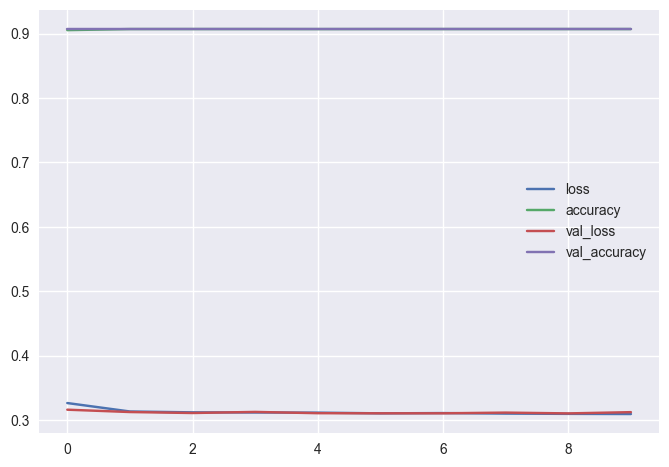

In [507]:
# PLot learning curve 
pd.DataFrame(history.history).plot()

### 90% accuracy from first epochs , wow , quit impressime , isn't it ? It's a bit supicious , so lets check how your model predits each class

In [508]:
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)
y_pred = model_1.predict(X_test_transformed)

def plot_confusion(y_test,y_pred):

    y_pred = tf.constant(y_pred)

    # Create the confusion matrix
    cm = confusion_matrix(y_test,tf.round(y_pred))
    cm_normal = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    n_classes = cm.shape[0]

    #prettifying 
    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes 
    classes = False

    if classes:
        labels = classes 
    else:
        labels = np.arange(cm.shape[0])



    #label the axes 
    ax.set(title = 'Confusion matrix',
            xlabel = 'Predicted label',
            ylabel = 'True label',
            xticks = np.arange(n_classes),
            yticks  = np.arange(n_classes),
            xticklabels = labels,
            yticklabels = labels)

    # Set x-axis labels to the bottom 
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set threshold for different colors 
    threshold = (cm.max() + cm.min()) / 2 

    # Plot the text on each cell 
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,f'{cm[i,j]}({cm_normal[i,j]*100:.1f}%)',
                horizontalalignment = 'center',
                color  = 'white' if cm[i,j] > threshold else "black",
                size = 15),

267/267 [==============================] - 0s 992us/step


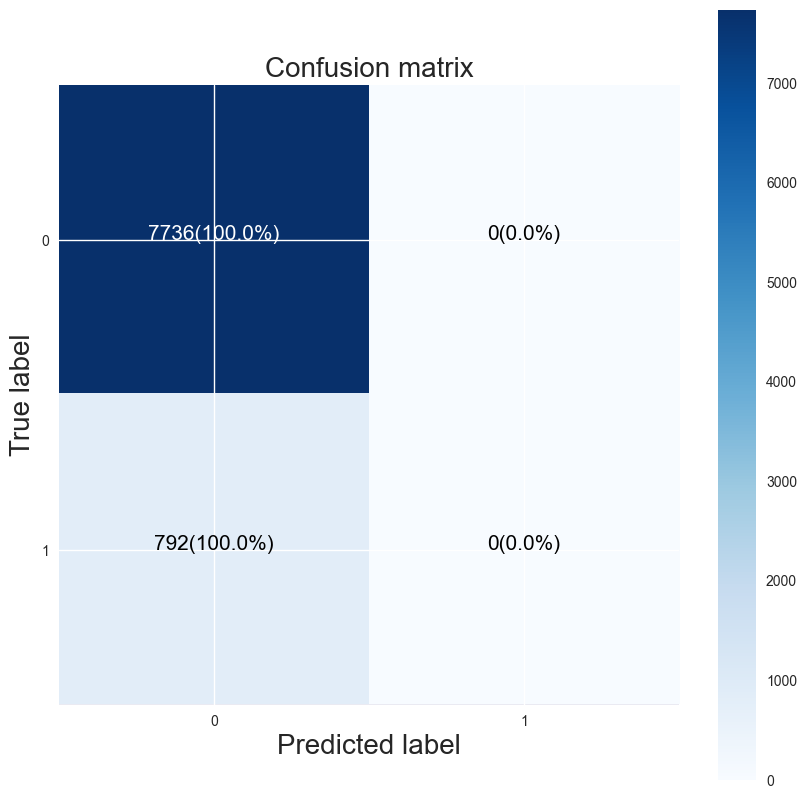

In [509]:
plot_confusion(y_test,y_pred)

In [510]:
# Show distribution of responses 
number_yes = len(data_shuffled[data_shuffled['term_deposit'] == 'yes'])
number_no = len(data_shuffled[data_shuffled['term_deposit'] == 'no'])

print(f"Number of rejected offers: {number_no}\n Number of acceped offers: {number_yes}")
print(data_shuffled['term_deposit'].unique())

Number of rejected offers: 38678
 Number of acceped offers: 3961
['no' 'yes']


In [511]:
# Create a new equely distributed data set 
data_negative  = pd.DataFrame(data_shuffled[data_shuffled['term_deposit'] == 'no'][:number_yes])
data_positive = pd.DataFrame(data_shuffled[data_shuffled['term_deposit'] == 'yes'])
data_new = pd.concat([data_negative,data_positive]).sample(frac=1 , random_state= 42).reset_index(drop = True)
data_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,32,management,single,tertiary,no,3283,no,no,cellular,12,aug,623,2,191,2,success,yes
1,55,management,divorced,tertiary,no,608,yes,no,cellular,7,may,161,2,-1,0,unknown,no
2,33,management,married,tertiary,no,442,yes,no,unknown,7,may,463,1,-1,0,unknown,no
3,64,management,married,tertiary,no,6251,no,no,telephone,5,feb,125,7,-1,0,unknown,no
4,55,management,married,tertiary,no,926,yes,no,cellular,17,nov,309,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,41,management,divorced,tertiary,no,3426,no,no,cellular,4,jun,102,2,297,3,failure,yes
7918,33,student,married,secondary,no,1536,no,no,cellular,9,nov,262,1,94,2,success,yes
7919,30,entrepreneur,married,primary,no,386,yes,no,cellular,15,may,253,4,-1,0,unknown,no
7920,52,unemployed,married,primary,no,959,no,no,telephone,30,jul,694,2,-1,0,unknown,yes


In [512]:
# Make new X ,y values 

X_new =data_new.drop(['term_deposit','duration'], axis = 1 )
y_new = pd.get_dummies(data_new['term_deposit'])['yes']

# Scale values 

X_train_scaled_new , X_test_scaled_new, y_train_new, y_test_new = scale(X_new, y_new) 

# Removing higly corelated tables 
X_train_scaled_new = X_train_scaled_new.drop([26,28,30,33,49], axis = 1)
X_test_scaled_new = X_test_scaled_new.drop([26,28,30,33,49], axis = 1)

## Create the same  model as the last time but with nicely distributed categories in target values 

In [513]:
from imblearn.keras import balanced_batch_generator
from imblearn.under_sampling import NearMiss
# set a randome seed 
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation ='relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    

    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



#Fit the model
history_new = model_2.fit(X_train_scaled_new,
                        y_train_new,
                        epochs = 30,
                        validation_data = (X_test_scaled_new,y_test_new))

Epoch 1/30
199/199 [==============================] - 1s 2ms/step - loss: 0.6850 - accuracy: 0.5719 - val_loss: 0.6809 - val_accuracy: 0.5741
Epoch 2/30
199/199 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6282 - val_loss: 0.6504 - val_accuracy: 0.6297
Epoch 3/30
199/199 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6527 - val_loss: 0.6396 - val_accuracy: 0.6391
Epoch 4/30
199/199 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.6604 - val_loss: 0.6335 - val_accuracy: 0.6505
Epoch 5/30
199/199 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.6688 - val_loss: 0.6317 - val_accuracy: 0.6347
Epoch 6/30
199/199 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.6696 - val_loss: 0.6246 - val_accuracy: 0.6467
Epoch 7/30
199/199 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.6689 - val_loss: 0.6209 - val_accuracy: 0.6562
Epoch 

In [514]:
y_prediction = model_2.predict(X_test_scaled_new)

50/50 [==============================] - 0s 1ms/step


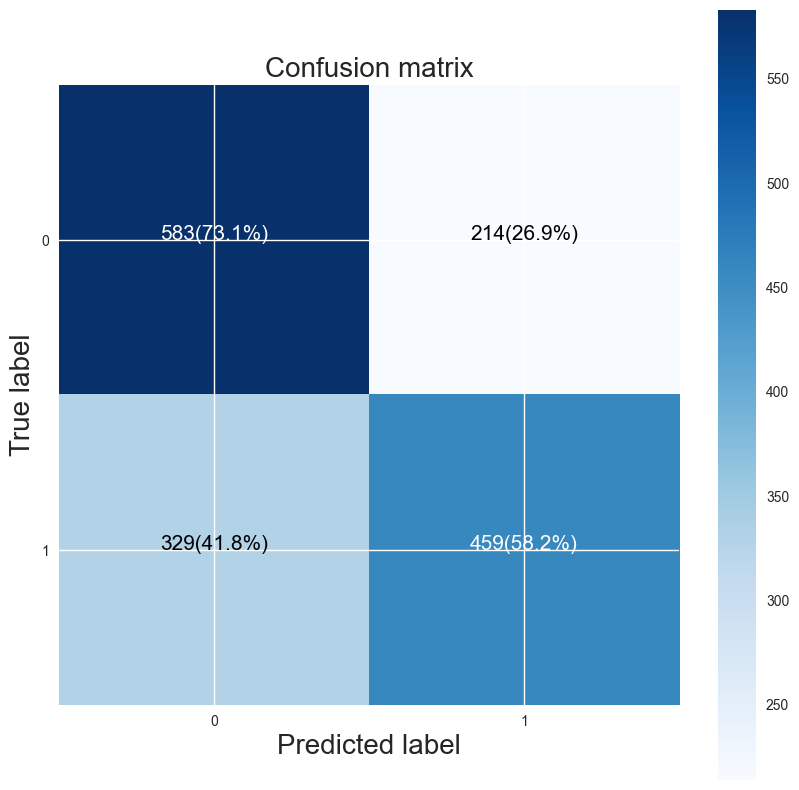

In [515]:
plot_confusion(y_test_new,y_prediction)

<AxesSubplot:>

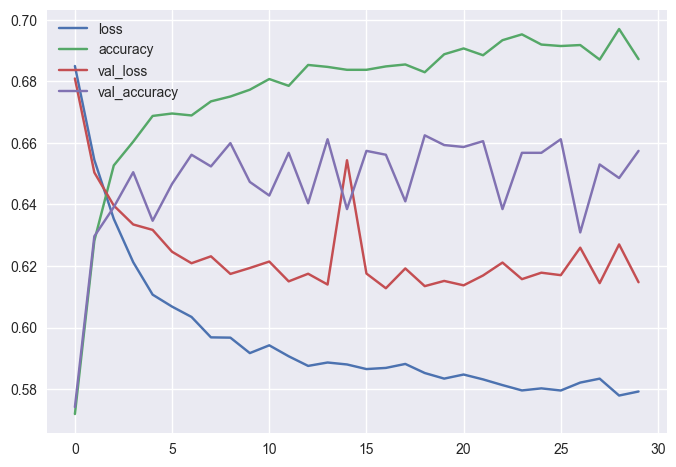

In [516]:
pd.DataFrame(history_new.history).plot()

## From above graph we can see that the model's validation  loss goes incosistenly it may be a sign of :
* Too high leraning rate 
* Overfitting of the model 


### Find optimal learning rate 

In [517]:
# Make the model with learning rate scheduler callback

# Set random seed 
from gc import callbacks


tf.random.set_seed(42)

# Create the model (We will use the same base as in the last model)

model_lr = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(5, activation ='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_lr.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Create a learning rate scheduler callback

ler_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20) )

# Fit the model
history_lr = model_lr.fit(X_train_scaled_new,
                            y_train_new,
                            epochs = 100,
                            validation_data = (X_test_scaled_new,y_test_new),
                            callbacks = [ler_scheduler])

Epoch 1/100
199/199 [==============================] - 1s 3ms/step - loss: 0.7177 - accuracy: 0.5488 - val_loss: 0.6909 - val_accuracy: 0.5338 - lr: 1.0000e-04
Epoch 2/100
199/199 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5503 - val_loss: 0.6879 - val_accuracy: 0.5552 - lr: 1.1220e-04
Epoch 3/100
199/199 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5618 - val_loss: 0.6828 - val_accuracy: 0.5666 - lr: 1.2589e-04
Epoch 4/100
135/199 [===================>..........] - ETA: 0s - loss: 0.6768 - accuracy: 0.5745

KeyboardInterrupt: 

Text(0.5, 1.0, 'Finding the ideal learning rate')

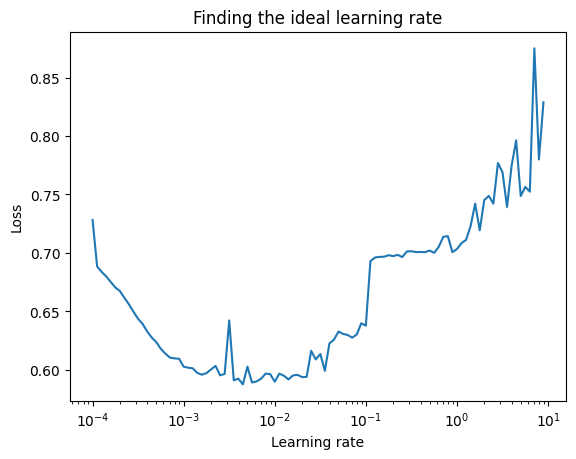

In [ ]:
# Visualize loss curve 
lr_data = pd.DataFrame(history_lr.history)
lr = lr_data['lr']
plt.semilogx(lr,lr_data['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [ ]:
# Great learning rate is 10**-4, thus lets try to build a model with it 
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])


# Fit the model
history_4  = model_4.fit(X_train_scaled_new,
                        y_train_new,
                        epochs = 30,
                        validation_data = (X_test_scaled_new, y_test_new))

Epoch 1/30
199/199 [==============================] - 2s 4ms/step - loss: 0.7281 - accuracy: 0.5421 - val_loss: 0.6845 - val_accuracy: 0.5584
Epoch 2/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.5449 - val_loss: 0.6825 - val_accuracy: 0.5621
Epoch 3/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6844 - accuracy: 0.5589 - val_loss: 0.6799 - val_accuracy: 0.5647
Epoch 4/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6813 - accuracy: 0.5656 - val_loss: 0.6753 - val_accuracy: 0.5767
Epoch 5/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6779 - accuracy: 0.5793 - val_loss: 0.6740 - val_accuracy: 0.5893
Epoch 6/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6749 - accuracy: 0.5847 - val_loss: 0.6700 - val_accuracy: 0.5874
Epoch 7/30
199/199 [==============================] - 1s 3ms/step - loss: 0.6729 - accuracy: 0.5905 - val_loss: 0.6701 - val_accuracy: 0.5968
Epoch 

50/50 [==============================] - 0s 2ms/step


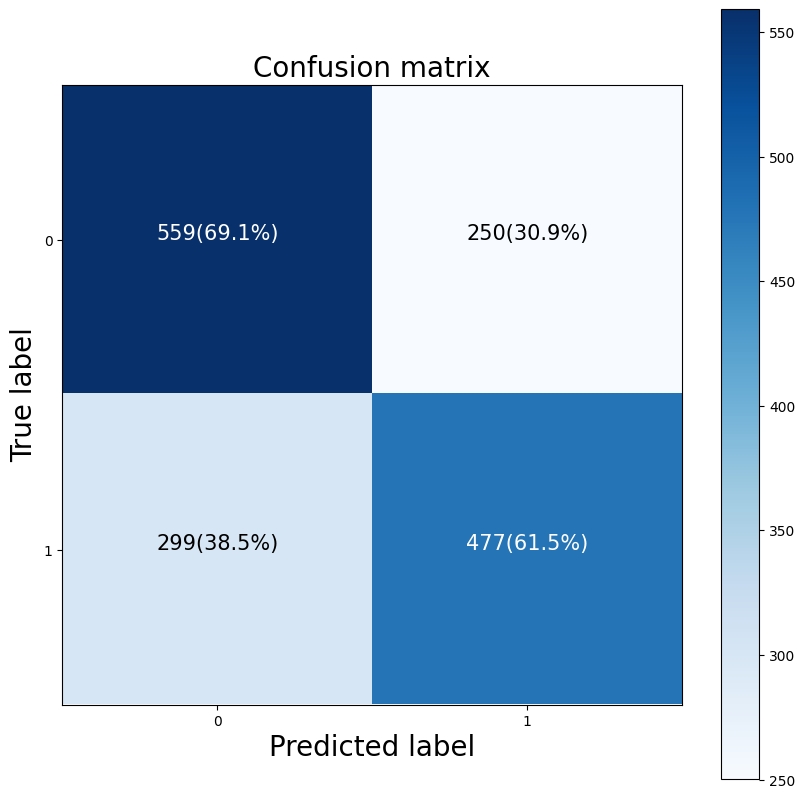

In [ ]:
# Plot confusion matrix
y_pred = model_4.predict(X_test_scaled_new)



plot_confusion(y_test_new, y_pred)

<AxesSubplot:>

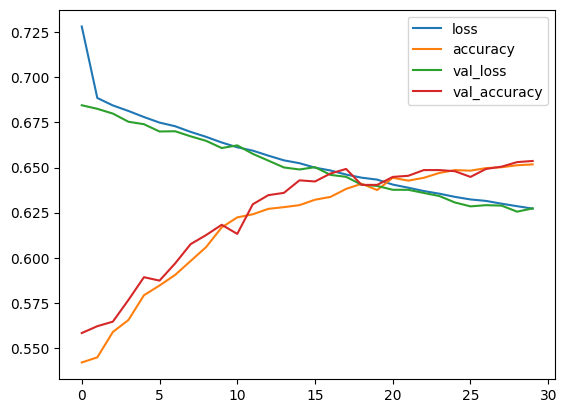

In [ ]:
# Plot learning curve 
pd.DataFrame(history_4.history).plot()

In [ ]:
# Great learning rate is 10**-4, thus lets try to build a model with it 
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(5,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20 , min_delta=0.0005)


# Fit the model
history_5  = model_5.fit(X_train_scaled_new,
                        y_train_new,
                        epochs = 3000,
                        validation_data = (X_test_scaled_new, y_test_new),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


199/199 [==============================] - 2s 4ms/step - loss: 0.7281 - accuracy: 0.5421 - val_loss: 0.6845 - val_accuracy: 0.5584
Epoch 2/3000
199/199 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.5449 - val_loss: 0.6825 - val_accuracy: 0.5621
Epoch 3/3000
199/199 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5589 - val_loss: 0.6799 - val_accuracy: 0.5647
Epoch 4/3000
199/199 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5656 - val_loss: 0.6753 - val_accuracy: 0.5767
Epoch 5/3000
199/199 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5793 - val_loss: 0.6740 - val_accuracy: 0.5893
Epoch 6/3000
199/199 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5847 - val_loss: 0.6700 - val_accuracy: 0.5874
Epoch 7/3000
199/199 [==============================] - 1s 5ms/step - loss: 0.6729 - accuracy: 0.5905 - val_loss: 0.6701 - val_accuracy: 0.5968
Epoch

<AxesSubplot:>

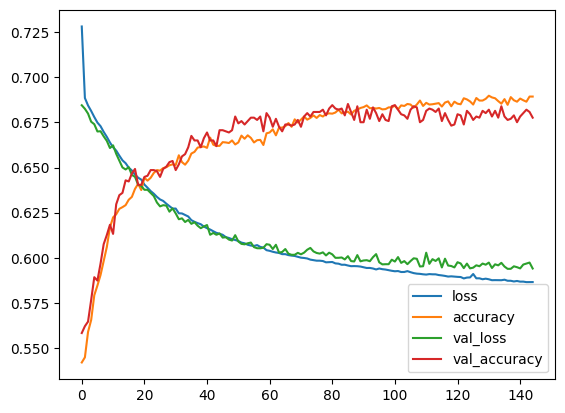

In [ ]:
pd.DataFrame(history_5.history).plot()

50/50 [==============================] - 0s 1ms/step


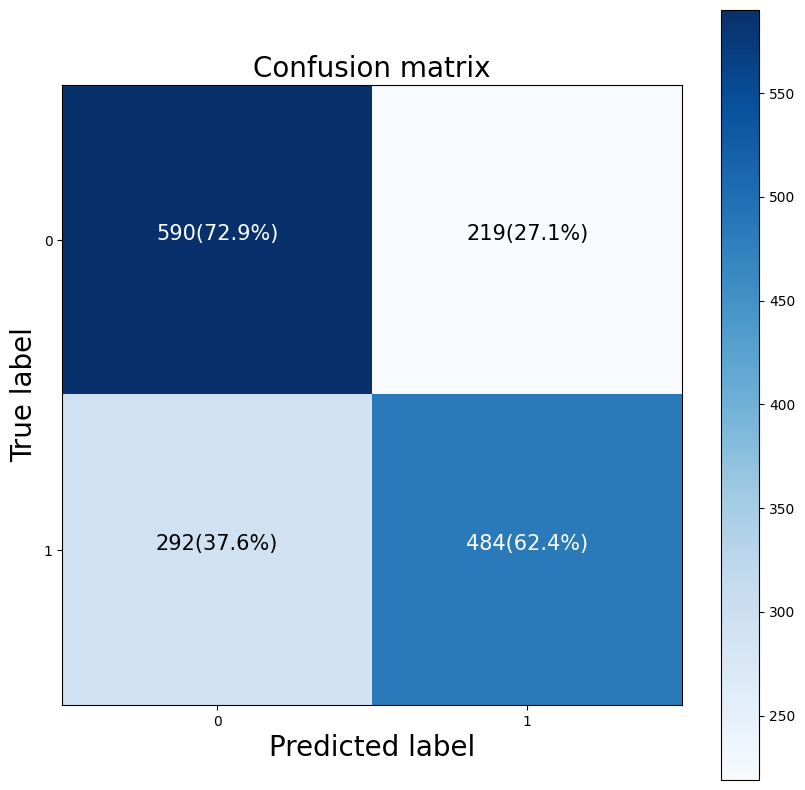

In [ ]:
# Plot confustion matrics 
y_pred_5 = model_5.predict(X_test_scaled_new)

plot_confusion(y_test_new, y_pred_5)

In [ ]:
def model_evaluate(model, history,X_test_scaled_new = X_test_scaled_new ,y_test_new = y_test_new):
    # Make a model prediction
    y_pred = model.predict(X_test_scaled_new)
    
    # See model preforamance 
    model_result  = str(round(model.evaluate(X_test_scaled_new,y_test_new)[1], 3)) + '%'
    print(f'Model prediction score is: {model_result} \n')

    # Plot the learning curve 
    pd.DataFrame(history.history).plot()

    # Plot confustion matrix 
    plot_confusion(y_test_new, y_pred)





In [ ]:
# Lets try to do more complex model
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_6.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20 , min_delta=0.0005)


# Fit the model
history_6  = model_6.fit(X_train_scaled_new,
                        y_train_new,
                        epochs = 3000,
                        validation_data = (X_test_scaled_new, y_test_new),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


199/199 [==============================] - 2s 4ms/step - loss: 0.9485 - accuracy: 0.5155 - val_loss: 0.6913 - val_accuracy: 0.5180
Epoch 2/3000
199/199 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.5389 - val_loss: 0.6899 - val_accuracy: 0.5375
Epoch 3/3000
199/199 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5566 - val_loss: 0.6870 - val_accuracy: 0.5514
Epoch 4/3000
199/199 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5755 - val_loss: 0.6842 - val_accuracy: 0.5798
Epoch 5/3000
199/199 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5866 - val_loss: 0.6817 - val_accuracy: 0.5817
Epoch 6/3000
199/199 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5918 - val_loss: 0.6800 - val_accuracy: 0.5893
Epoch 7/3000
199/199 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5959 - val_loss: 0.6800 - val_accuracy: 0.5817
Epoch

50/50 [==============================] - 0s 1ms/step - loss: 0.5988 - accuracy: 0.6675
Model prediction score is: 0.599% 



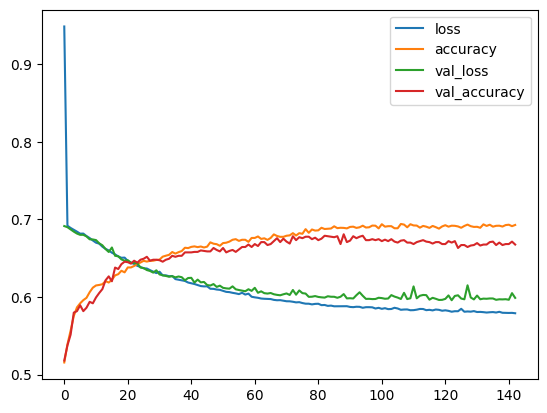

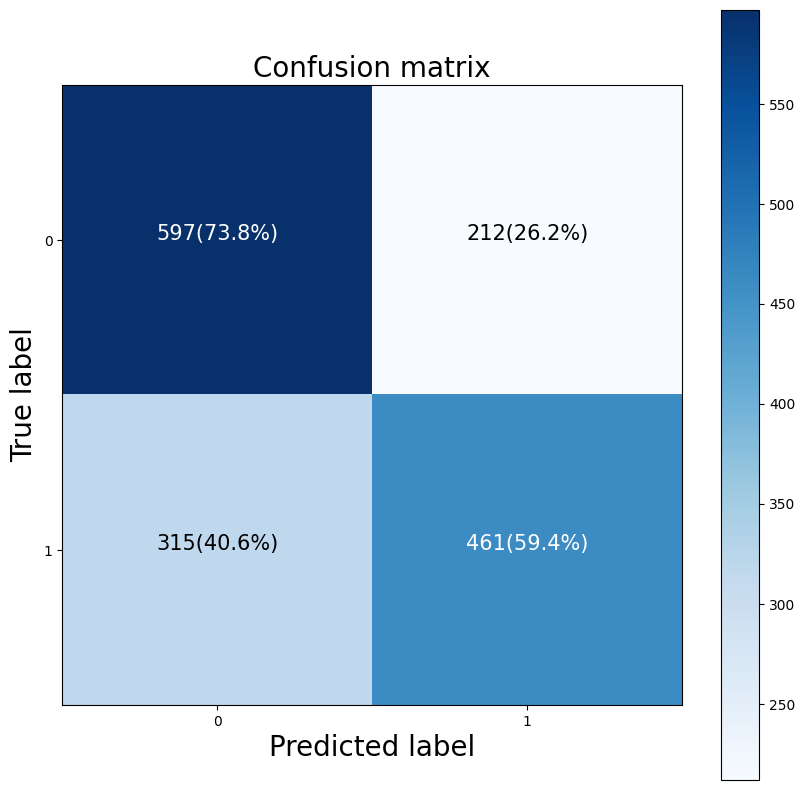

In [ ]:
model_evaluate(model_6, history_6)

## Most likely or model suffers from high number of outliers in our training data. Let's try to ger rid of them and look how it will effect our models perforamnce

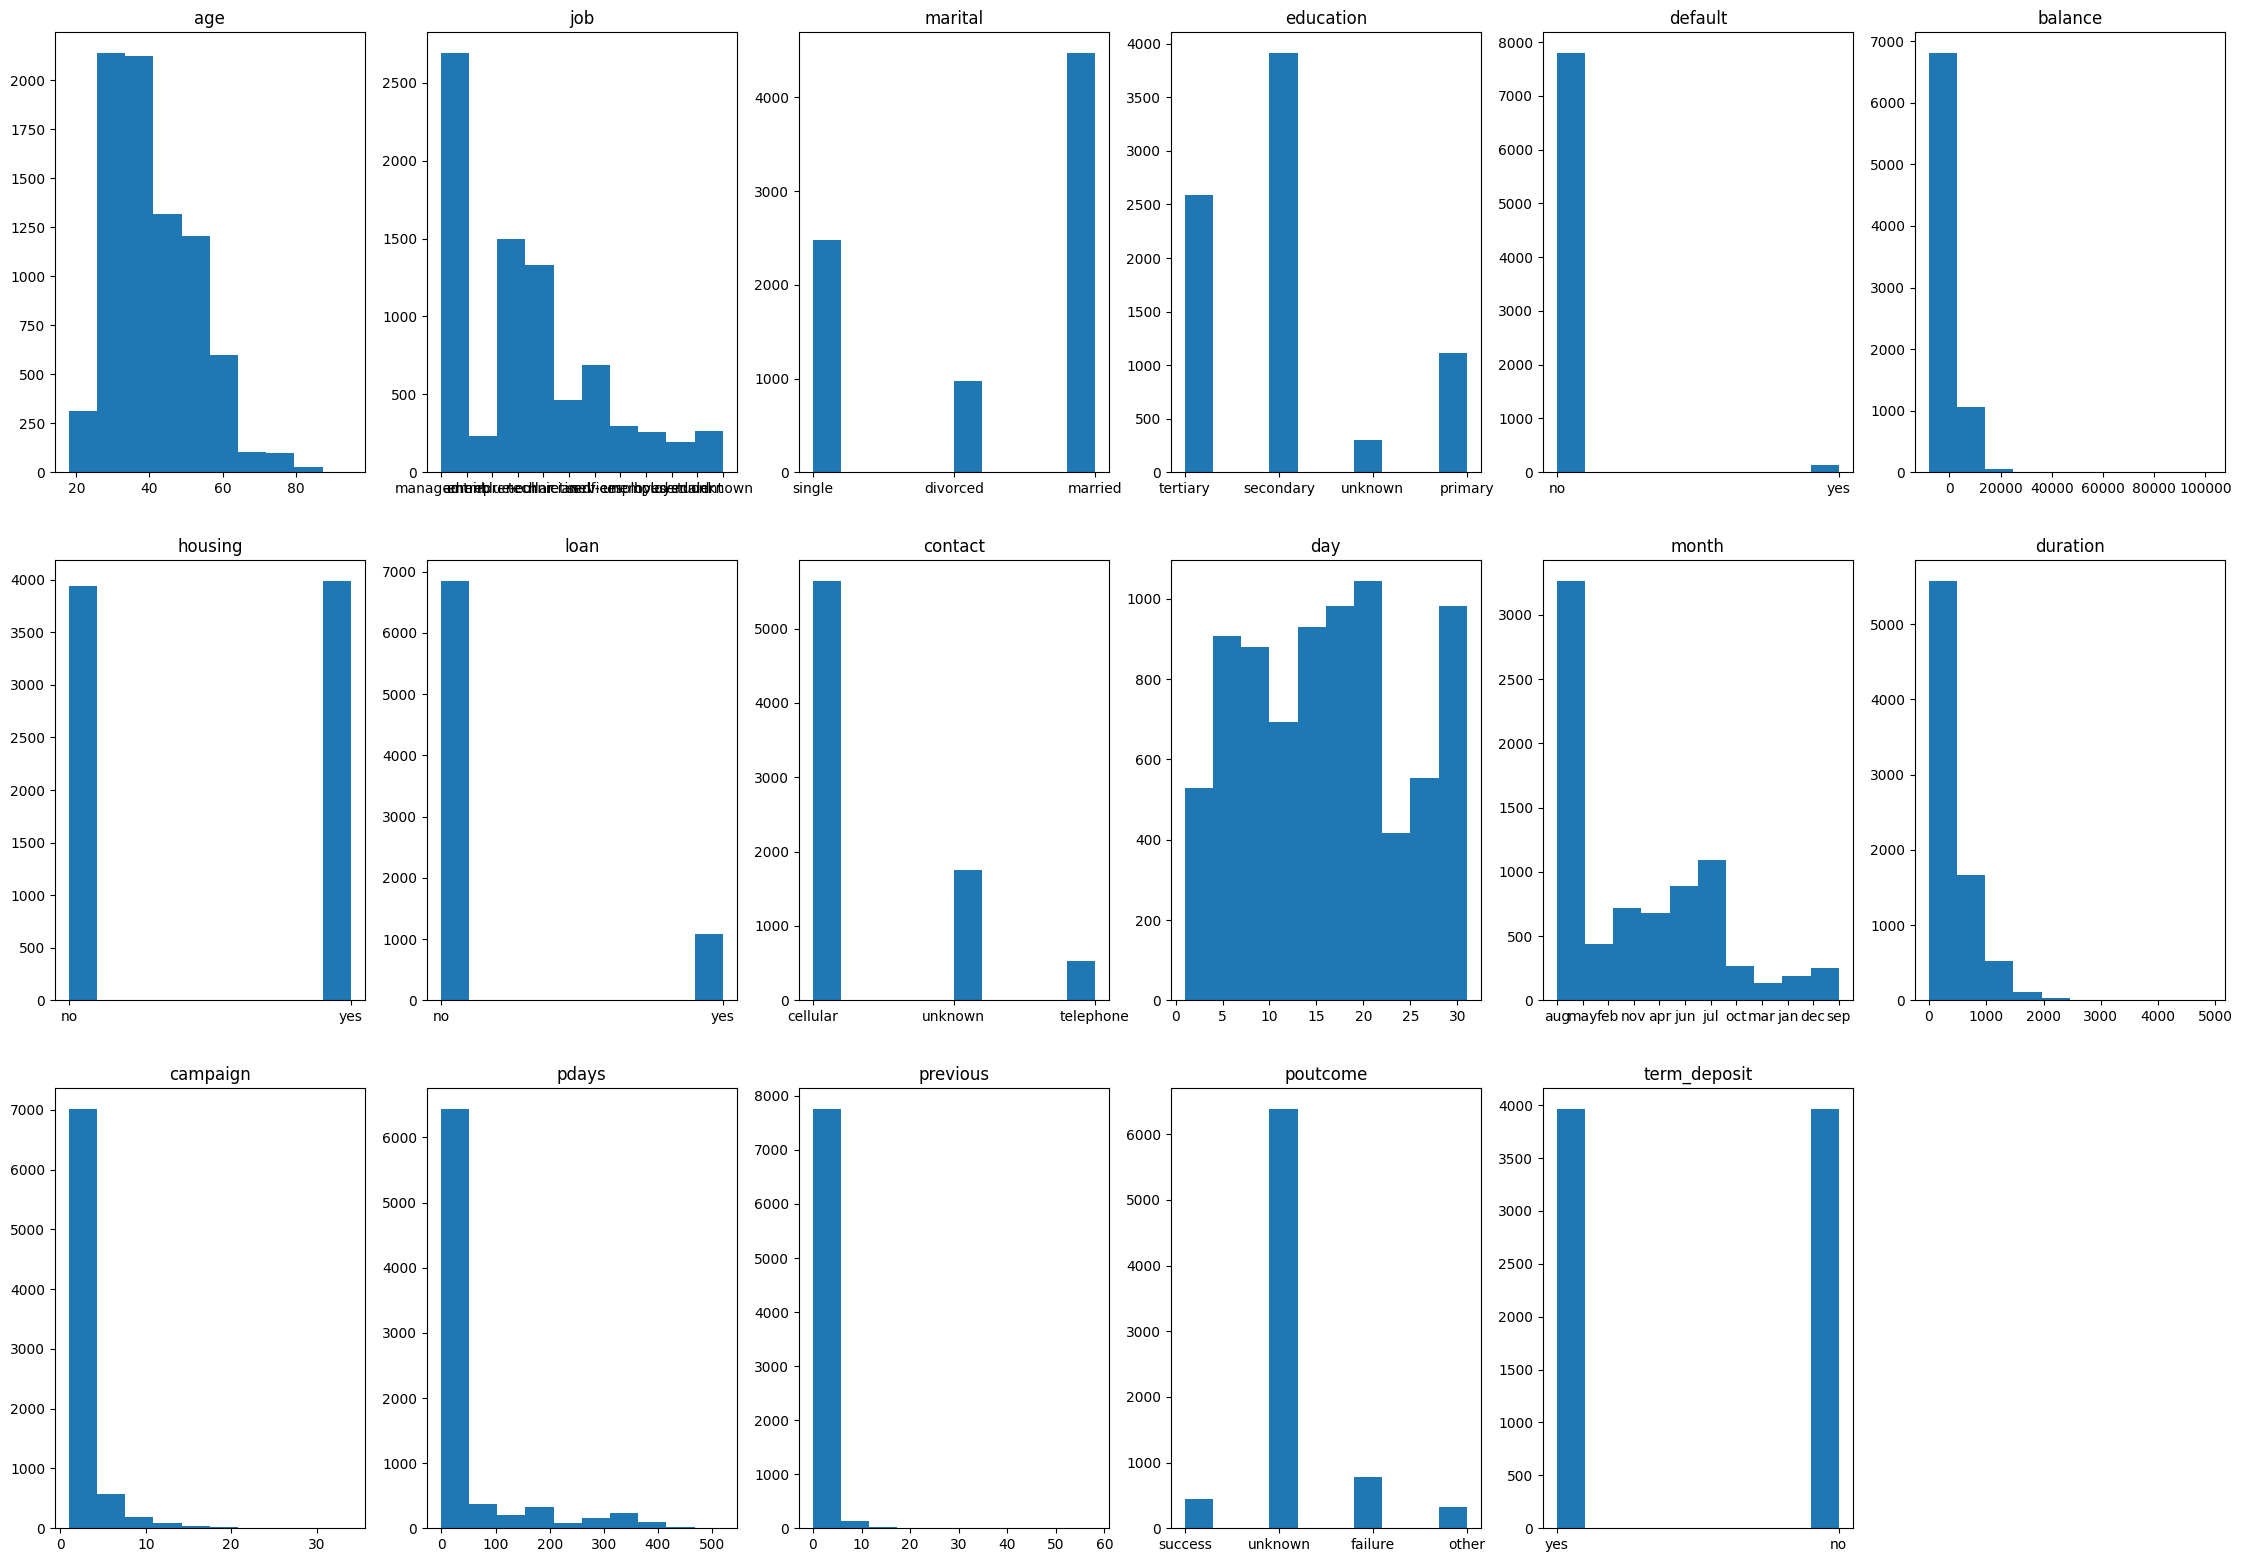

In [ ]:
plot_distributions(data_new)
balance  =data_new[['balance', 'duration','campaign', 'pdays', 'previous']]

In [ ]:
balance.describe()

,balance,duration,campaign,pdays,previous
count,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000
mean,1479.937137,407.059707,2.552638,38.003030,0.576243
std,3134.065460,382.524167,2.610046,92.421149,1.946009
min,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,102.000000,143.000000,1.000000,-1.000000,0.000000
50%,520.000000,267.000000,2.000000,-1.000000,0.000000
75%,1643.250000,566.750000,3.000000,-1.000000,0.000000
max,102127.000000,4918.000000,34.000000,520.000000,58.000000


<function matplotlib.pyplot.show(close=None, block=None)>

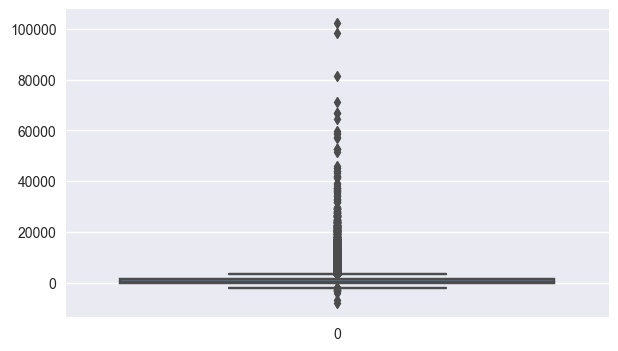

In [ ]:
import seaborn as sns
plt.style.use('seaborn')
plt.figure(figsize=(7,4))
sns.boxplot(data['balance'])
plt.show

In [ ]:
cor = balance.corr()
cor.style.background_gradient(cmap='coolwarm')

,balance,duration,campaign,pdays,previous
balance,1.000000,0.018926,-0.033596,0.017038,0.031918
duration,0.018926,1.000000,-0.025393,-0.027554,-0.027748
campaign,-0.033596,-0.025393,1.000000,-0.095911,-0.047519
pdays,0.017038,-0.027554,-0.095911,1.000000,0.523937
previous,0.031918,-0.027748,-0.047519,0.523937,1.000000


In [ ]:
# Removing the outliers
def removeOutliers(data_remove, col):
	Q3 = np.quantile(data_remove[col], 0.75)
	Q1 = np.quantile(data_remove[col], 0.25)
	IQR = Q3 - Q1

	if IQR > 0	:
		lower_range = Q1 - 1.5 * IQR
		upper_range = Q3 + 1.5 * IQR
		
		data_out_free = data[(data_remove[col] > lower_range )& (data_remove[col]< upper_range)]
	

	else :
		upper_range = np.quantile(data_remove[col], 0.85)
		
		data_out_free = data[data_remove[col]< upper_range]

	print('Number of rows that were removed: ', len(data_remove) - len(data_out_free) )
	print('Old mean and std:' ,data_remove[col].mean(), data_remove[col].std())
	print('New mean and std', data_out_free[col].mean(), data_out_free[col].std())
	return data_out_free


In [ ]:
data_base = data
data_qr = data

In [ ]:
target_columns = ['balance', 'duration','campaign', 'pdays', 'previous']
for i in target_columns:
    out_free_data = removeOutliers(data_qr, i)
    
    print(len(out_free_data))

    out_free_data = out_free_data
	


# Assigning filtered data back to our original variable

Number of rows that were removed:  4535
Old mean and std: 1331.863950843125 3011.5376755489046
New mean and std 610.6857285324376 818.1268003489484
38104
Number of rows that were removed:  3140
Old mean and std: 255.95750369380144 258.36136793204577
New mean and std 199.90766854857085 138.80997088572923
39499
Number of rows that were removed:  4275
Old mean and std: 2.8164122047890428 3.1635637092732494
New mean and std 2.0263006985715775 1.145109390121304
38364
Number of rows that were removed:  6397
Old mean and std: 34.16914092732006 92.04171263435984
New mean and std -0.9528171734451741 0.8613060491679821
36242
Number of rows that were removed:  6557
Old mean and std: 0.46544243532915874 2.1667051325880746
New mean and std 0.0 0.0
36082


In [ ]:
data_qr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [ ]:
out_free_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42631,28,self-employed,single,tertiary,no,4579,no,no,cellular,12,jan,409,2,-1,0,unknown,yes
42632,29,blue-collar,single,secondary,no,180,no,no,cellular,12,jan,350,2,-1,0,unknown,no
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [ ]:
# Create a new equely distributed data set 
out_free_data = out_free_data.sample(frac=1, random_state=42)

data_positive = pd.DataFrame(out_free_data[out_free_data['term_deposit'] == 'yes'])
data_negative  = pd.DataFrame(out_free_data[out_free_data['term_deposit'] == 'no'][:len(data_positive)])

bal_out_free = pd.concat([data_negative,data_positive]).sample(frac=1 , random_state= 42).reset_index(drop = True)

X_out = bal_out_free.drop(['term_deposit','duration'], axis = 1 )
y_out = pd.get_dummies(bal_out_free['term_deposit'])['yes']


X_train_out, X_test_out, y_train_out, y_test_out = scale(X_out, y_out)

X_train_out= X_train_out.drop([26,28,30,33], axis = 1)
X_test_out= X_test_out.drop([26,28,30,33], axis = 1)



In [ ]:
X_train_out


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.116883,0.500000,-0.541995,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.766234,0.633333,0.845801,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.298701,0.466667,1.424541,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.350649,0.033333,-0.305774,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.168831,0.900000,-0.258530,0.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,0.129870,0.133333,0.233596,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4775,0.220779,0.566667,8.998688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4776,0.220779,0.233333,1.612205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4777,0.142857,0.533333,0.102362,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'relu'),
   
    
    
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20 , min_delta=0.0001)


# Fit the model
history_7  = model_7.fit(X_train_out,
                        y_train_out,
                        epochs = 3000,
                        validation_data = (X_test_out, y_test_out),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


150/150 [==============================] - 1s 4ms/step - loss: 0.6893 - accuracy: 0.5294 - val_loss: 0.6895 - val_accuracy: 0.5314
Epoch 2/3000
150/150 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5597 - val_loss: 0.6872 - val_accuracy: 0.5431
Epoch 3/3000
150/150 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5694 - val_loss: 0.6852 - val_accuracy: 0.5623
Epoch 4/3000
150/150 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5742 - val_loss: 0.6835 - val_accuracy: 0.5598
Epoch 5/3000
150/150 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5746 - val_loss: 0.6819 - val_accuracy: 0.5573
Epoch 6/3000
150/150 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5769 - val_loss: 0.6801 - val_accuracy: 0.5615
Epoch 7/3000
150/150 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5802 - val_loss: 0.6783 - val_accuracy: 0.5674
Epoch

38/38 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.6410
Model prediction score is: 0.63% 



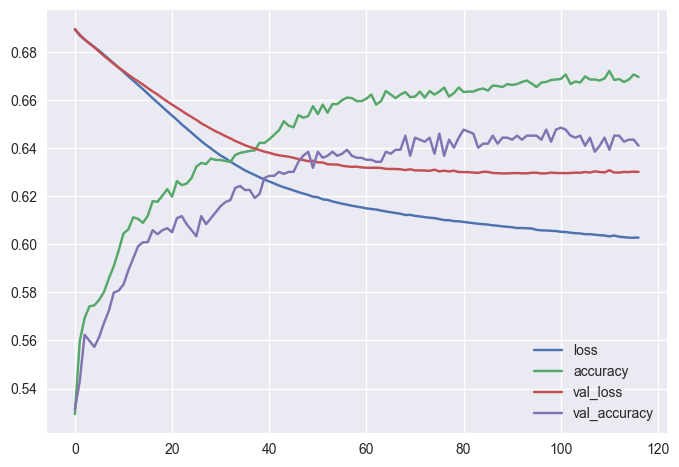

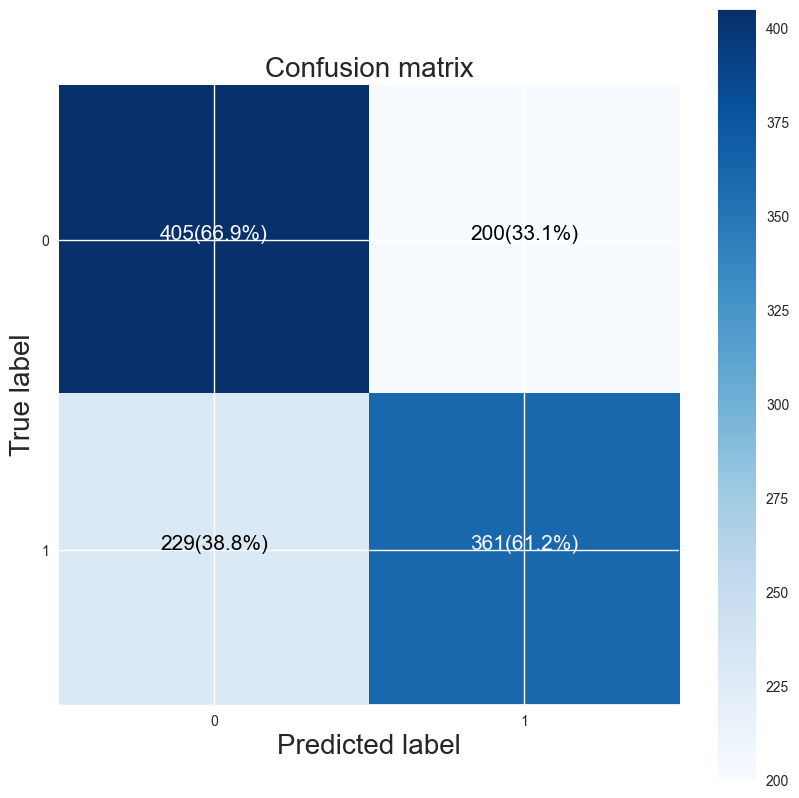

In [ ]:
model_evaluate(model_7, history_7 , X_test_scaled_new=X_test_out, y_test_new = y_test_out)

## Since regular ways to treat underfeeting doesn't work, we need to get back to our data

### Let's inspect unique values of each column

In [ ]:
data_base

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [ ]:
data_base['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92], dtype=int64)

In [ ]:
data_base['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

#### Uhuu , we found "Unknow" values, which means we cat treat it as NUll value. For now let's leave this value like it is and move forvard to inspect all other columns


In [ ]:
data_base['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

# Since we know that all null values are marked as "Unknown", lets create a function to see where unkown value is present

In [ ]:
def unknown(data_frame):
    columns = data_frame.columns

    presence_list = []
    for i in columns:
        if 'unknown' in data_frame[i].unique():
            presence_list.append(i)
    return presence_list

unknowns = unknown(data_base)
unknowns

C:\Users\Admin\AppData\Local\Temp\ipykernel_11064\3540880185.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in data_frame[i].unique():


['job', 'education', 'contact', 'poutcome']

In [ ]:

data_removed = data_base
data_removed['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
for i in unknowns:
    data_removed.drop(data_base[data_base[i]  == 'unknown'].index, inplace = True )

In [ ]:
data_removed['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [ ]:
data_removed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42625,66,retired,single,tertiary,no,0,no,no,cellular,12,jan,105,1,92,2,failure,no
42627,28,services,single,secondary,no,168,no,no,cellular,12,jan,387,1,194,1,other,yes
42633,49,management,married,tertiary,no,1093,yes,yes,cellular,12,jan,243,2,91,2,success,yes
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes


# Okay, we are left with 6300 records, let's try to predict based on this data 

In [ ]:
# Create a new equely distributed data set 
data_removed = data_removed.sample(frac=1, random_state=42)

data_positive = pd.DataFrame(data_removed[data_removed['term_deposit'] == 'yes'])
data_negative  = pd.DataFrame(data_removed[data_removed['term_deposit'] == 'no'][:len(data_positive)])

bal_out_free = pd.concat([data_negative,data_positive]).sample(frac=1 , random_state= 42).reset_index(drop = True)

X_removed = bal_out_free.drop(['term_deposit','duration'], axis = 1 )
y_removed = pd.get_dummies(bal_out_free['term_deposit'])['yes']


X_train_removed, X_test_removed, y_train_removed, y_test_removed = scale(X_removed, y_removed)


In [ ]:
corr = X_train_removed.corr()
cor.style.background_gradient(cmap = 'coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,29,31,32,34,35,36,37,38,39,40,41,42,43,44,45
0,1.000000,0.036134,0.087862,0.040291,-0.027771,0.006762,-0.055143,-0.027523,-0.012992,0.068428,-0.022765,0.493492,0.000920,-0.065081,-0.215499,-0.051632,0.014168,0.136535,0.354255,-0.461242,0.222346,-0.072069,-0.064051,0.038540,-0.038540,0.165861,-0.018486,-0.162058,-0.038860,0.025117,-0.047566,0.040428,0.004697,0.001651,0.018476,-0.112390,0.067905,0.126862,0.006767,0.042877,-0.072580,0.021733
1,0.036134,1.000000,0.056330,-0.002211,-0.113253,-0.017819,-0.041024,0.027515,-0.053222,0.024711,-0.003725,0.039836,-0.031033,-0.034073,0.050738,0.041883,-0.033388,0.008652,-0.018314,0.013488,0.008428,-0.039888,0.036097,-0.003049,0.003049,0.085500,0.019760,-0.003032,0.266494,0.029405,-0.335044,0.313198,-0.091081,-0.227203,-0.009780,-0.147139,0.119969,0.127442,-0.073648,-0.041964,0.012489,0.037215
2,0.087862,0.056330,1.000000,-0.007620,-0.120937,0.005856,-0.065419,-0.061717,-0.034859,-0.013801,0.111385,0.091359,0.007863,-0.044186,0.004706,-0.002596,-0.012352,-0.028521,0.041483,-0.024669,-0.005184,-0.122692,0.130444,0.055220,-0.055220,0.118376,0.075373,-0.032951,-0.030369,0.012962,-0.075750,-0.052158,0.053960,0.030756,0.003039,-0.065347,0.094652,0.020281,0.070485,-0.039994,-0.016294,0.063635
3,0.040291,-0.002211,-0.007620,1.000000,0.105082,0.195400,-0.048684,0.072574,0.028051,0.030828,-0.007512,-0.037235,-0.001563,0.070591,-0.033723,-0.057199,-0.002938,-0.059098,0.071966,-0.036457,0.063161,0.010975,-0.050800,-0.015617,0.015617,-0.069372,-0.024028,-0.109655,-0.041758,-0.018390,0.021034,-0.017405,-0.015773,-0.026461,0.015448,0.130679,-0.024361,-0.070259,-0.067644,-0.035365,0.157724,-0.115685
4,-0.027771,-0.113253,-0.120937,0.105082,1.000000,-0.017535,0.020362,0.194551,0.005004,-0.045001,-0.128126,-0.053362,-0.052740,0.116816,-0.090264,-0.053152,0.007230,0.035911,-0.002446,-0.021110,0.110575,0.158043,-0.232873,-0.050206,0.050206,-0.442803,-0.068033,0.015359,0.055334,-0.113391,-0.007531,-0.049156,0.068528,-0.189272,-0.039995,0.458204,-0.258590,-0.078547,-0.154326,0.195559,0.063718,-0.295219
5,0.006762,-0.017819,0.005856,0.195400,-0.017535,1.000000,-0.001928,0.017072,0.080152,-0.043209,-0.028480,-0.019589,-0.028120,0.001529,0.004042,0.038521,-0.040914,0.035952,-0.024777,0.002264,0.039561,0.006208,-0.031128,0.037939,-0.037939,-0.042503,-0.023961,-0.086230,0.001621,0.016265,0.019489,0.040445,-0.040184,-0.000383,0.000385,0.001059,0.019756,-0.076352,-0.027377,-0.020197,0.092889,-0.068877
6,-0.055143,-0.041024,-0.065419,-0.048684,0.020362,-0.001928,1.000000,-0.183466,-0.065191,-0.053008,-0.235844,-0.089907,-0.076401,-0.133987,-0.066113,-0.189735,-0.071421,0.099790,-0.108859,0.048291,-0.105669,0.244926,-0.187991,-0.038899,0.038899,-0.026693,-0.035188,0.019982,-0.015789,0.018356,0.022305,-0.045975,-0.020535,0.039626,0.034808,0.019551,-0.045941,-0.038935,0.015447,-0.027833,0.012264,0.020707
7,-0.027523,0.027515,-0.061717,0.072574,0.194551,0.017072,-0.183466,1.000000,-0.070260,-0.057130,-0.254182,-0.096897,-0.082342,-0.144405,-0.071254,-0.204488,-0.076974,-0.034380,0.116894,-0.099832,0.337351,0.106295,-0.320759,-0.031773,0.031773,-0.175615,-0.033403,-0.064895,0.044475,-0.083540,-0.001018,0.019343,-0.043484,-0.077670,-0.045026,0.173865,-0.045636,-0.057975,-0.033555,0.080798,0.021826,-0.117479
8,-0.012992,-0.053222,-0.034859,0.028051,0.005004,0.080152,-0.065191,-0.070260,1.000000,-0.020300,-0.090319,-0.034430,-0.029258,-0.051311,-0.025318,-0.072661,-0.027351,0.000417,0.064944,-0.068332,-0.008844,-0.037981,0.044899,-0.029860,0.029860,-0.042392,-0.013121,-0.031356,0.002284,-0.032518,0.035489,0.011977,0.075171,0.018085,-0.015999,0.000607,0.018898,-0.039756,-0.031933,0.004743,0.049513,-0.055079
9,0.068428,0.024711,-0.013801,0.030828,-0.045001,-0.043209,-0.053008,-0.057130,-0.020300,1.000000,-0.073440,-0.027996,-0.023791,-0.041722,-0.020587,-0.059082,-0.022240,0.023125,0.020556,-0.036786,0.064142,-0.030883,-0.008013,0.012564,-0.012564,0.075804,

In [ ]:
X_train_removed.drop([19,22,24], axis = 1, inplace = True)
X_test_removed.drop([19,22,24], axis = 1, inplace = True)

In [ ]:
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(16,activation = 'relu'),
   
    
    
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_8.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20 , min_delta=0.0001)


# Fit the model
history_8  = model_8.fit(X_train_removed,
                        y_train_removed,
                        epochs = 3000,
                        validation_data = (X_test_removed, y_test_removed),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 1s 6ms/step - loss: 0.6835 - accuracy: 0.5304 - val_loss: 0.6832 - val_accuracy: 0.5351
Epoch 2/3000
47/47 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.6116 - val_loss: 0.6640 - val_accuracy: 0.6081
Epoch 3/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.6874 - val_loss: 0.6417 - val_accuracy: 0.6757
Epoch 4/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.7064 - val_loss: 0.6176 - val_accuracy: 0.7162
Epoch 5/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.7199 - val_loss: 0.5955 - val_accuracy: 0.7297
Epoch 6/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7267 - val_loss: 0.5752 - val_accuracy: 0.7270
Epoch 7/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.7348 - val_loss: 0.5613 - val_accuracy: 0.7324
Epoch 8/3000
47/47 

12/12 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7784
Model prediction score is: 0.778% 



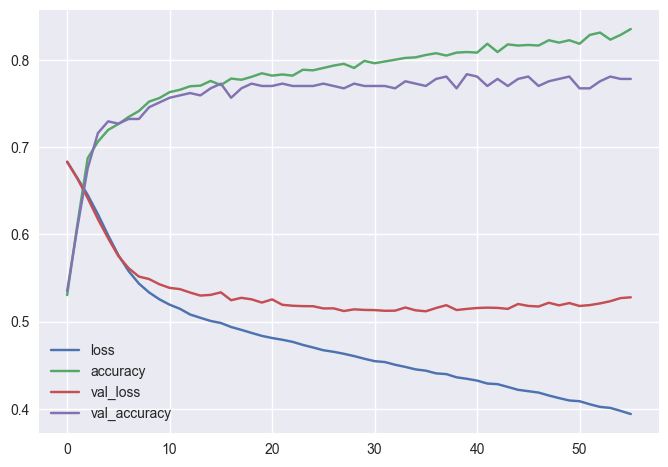

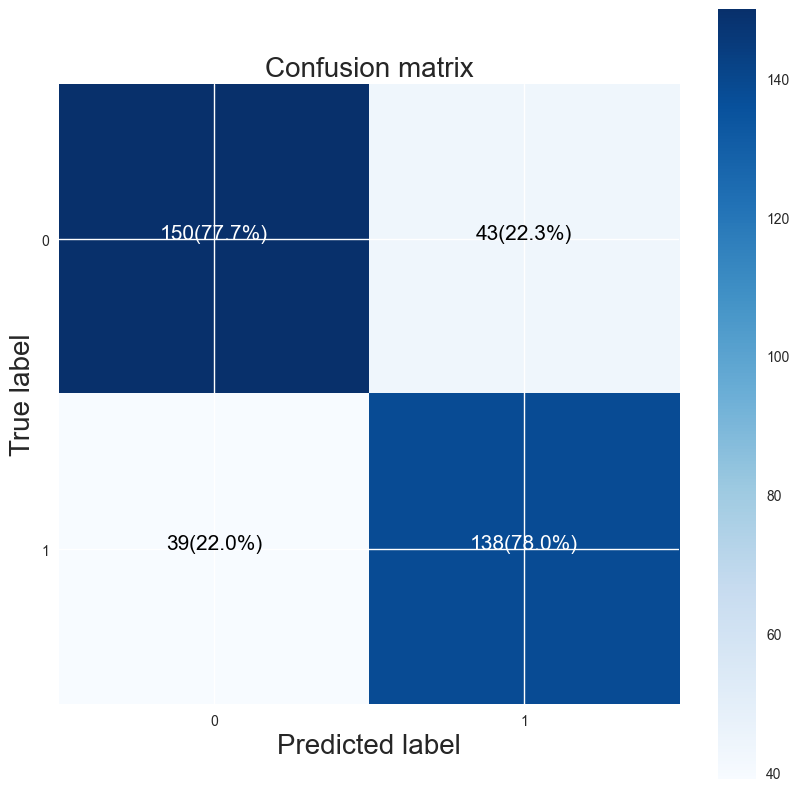

In [ ]:
model_evaluate(model_8, history_8 , X_test_scaled_new=X_test_removed, y_test_new = y_test_removed)

In [ ]:
cob = X_train_removed.corr()
cob.style.background_gradient(cmap = 'coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,1.000000,0.027938,0.112057,-0.000476,-0.036852,0.002905,-0.050147,-0.076633,-0.005676,0.073448,-0.025573,0.483617,0.006359,-0.037163,-0.208656,-0.030589,0.027808,0.193020,0.292637,0.218049,-0.060313,0.009583,0.151625,-0.151625,-0.048680,0.048680,-0.173239,0.173239,-0.082067,0.023813,0.070260,0.008750,0.035880,0.006565,-0.025071,0.012191,-0.133047,0.083736,0.125333,0.017070,0.004250,-0.026202,0.019422
1,0.027938,1.000000,0.059038,-0.030003,-0.084602,-0.041681,-0.030387,0.009133,-0.050155,0.035120,-0.001729,0.053104,-0.051542,-0.028726,0.041270,0.046041,-0.028668,-0.038017,0.036535,0.022716,-0.019581,0.006053,0.088386,-0.088386,-0.015947,0.015947,-0.002734,0.002734,0.244572,0.020555,0.035053,-0.307306,0.304570,-0.081655,-0.225226,0.005223,-0.173285,0.138826,0.119302,-0.067501,-0.023099,0.032483,-0.003336
2,0.112057,0.059038,1.000000,0.012936,-0.087536,-0.011100,-0.046717,-0.071731,-0.016100,0.001399,0.095088,0.110309,0.015354,-0.052538,-0.009578,-0.000543,-0.014503,-0.053002,0.043109,-0.016989,-0.081262,0.048598,0.111322,-0.111322,0.071111,-0.071111,-0.071447,0.071447,-0.051153,0.002125,0.123140,-0.057319,-0.029879,0.022940,0.015675,0.007271,-0.093953,0.093268,0.029687,0.046596,-0.037451,0.004938,0.038973
3,-0.000476,-0.030003,0.012936,1.000000,0.056754,0.202336,-0.038203,0.053713,0.075689,0.015654,0.002728,-0.050843,-0.029377,-0.011188,0.016097,-0.031490,0.016737,-0.059631,0.050917,0.025763,-0.009480,0.035374,-0.061845,0.061845,-0.001244,0.001244,-0.170382,0.170382,-0.077861,-0.040785,0.005426,0.094551,-0.055144,0.003298,0.011333,0.005457,0.098680,-0.001815,-0.052150,-0.068325,-0.002409,0.105179,-0.095001
4,-0.036852,-0.084602,-0.087536,0.056754,1.000000,-0.026484,0.009943,0.212768,0.022079,-0.038588,-0.144964,-0.047106,-0.036010,0.090089,-0.064529,-0.071289,0.010055,0.021122,0.023824,0.128593,0.128218,-0.061154,-0.427695,0.427695,-0.035244,0.035244,0.021038,-0.021038,0.035247,-0.082900,-0.017182,-0.009061,-0.024171,0.047274,-0.170947,-0.034090,0.474083,-0.291318,-0.075494,-0.177883,0.207474,0.030466,-0.269674
5,0.002905,-0.041681,-0.011100,0.202336,-0.026484,1.000000,-0.015651,0.023031,0.067114,0.000955,-0.032809,-0.016911,-0.028684,0.015408,0.002307,0.024449,-0.032979,0.008542,-0.015047,0.068896,-0.012229,-0.011705,-0.037499,0.037499,-0.064103,0.064103,-0.033772,0.033772,-0.042582,0.016739,0.004295,0.021953,-0.013651,-0.028851,0.016722,0.013624,0.028321,0.012327,-0.044569,-0.017203,-0.062286,0.131173,-0.049522
6,-0.050147,-0.030387,-0.046717,-0.038203,0.009943,-0.015651,1.000000,-0.197989,-0.069072,-0.053394,-0.230997,-0.084890,-0.071516,-0.123914,-0.064819,-0.165078,-0.073888,0.078071,-0.097830,-0.114742,0.235487,-0.011187,0.001865,-0.001865,-0.015360,0.015360,0.016748,-0.016748,-0.019258,0.020003,0.037783,0.036243,-0.003737,-0.000351,0.019275,0.051513,0.024708,-0.065917,-0.024910,-0.020809,-0.047990,0.031978,0.026089
7,-0.076633,0.009133,-0.071731,0.053713,0.212768,0.023031,-0.197989,1.000000,-0.085893,-0.066398,-0.287251,-0.105564,-0.088932,-0.154090,-0.080605,-0.205280,-0.091882,-0.061680,0.097153,0.337899,0.099864,-0.036118,-0.227313,0.227313,-0.026013,0.026013,0.005994,-0.005994,0.037926,-0.089747,-0.081322,0.016300,-0.043152,-0.046960,-0.088604,-0.044892,0.202302,-0.021626,-0.065028,-0.050945,0.094109,0.021886,-0.129823
8,-0.005676,-0.050155,-0.016100,0.075689,0.022079,0.067114,-0.069072,-0.085893,1.000000,-0.023164,-0.100212,-0.036828,-0.031025,-0.053757,-0.028120,-0.071615,-0.032055,0.002931,0.051293,-0.004307,-0.031676,0.014990,-0.049981,0.049981,-0.023326,0.023326,-0.011771,0.011771,-0.001497,-0.038148,-0.009004,-0.000405,-0.015678,0.045211,0.016929,-0.015661,0.031450,0.028565,-0.041135,-0.037721,0.053783,-0.014014,-0.049531
9,0.073448,0.035120,0.001399,0.015654,-0.038588,0.000955,-0.053394,-0.066398,-0.023164,1.000000,-0.077467,-0.028469,-0.023983,-0.041556,-0.021738,-0.055361,-0.024779,0.03465

In [ ]:
X_train_removed.drop([26,28,30], axis = 1, inplace = True)
X_test_removed.drop([26,28,30], axis = 1, inplace = True)

In [ ]:
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(16,activation = 'relu'),
   
    
    
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_9.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20 , min_delta=0.0001)


# Fit the model
history_9  = model_9.fit(X_train_removed,
                        y_train_removed,
                        epochs = 3000,
                        validation_data = (X_test_removed, y_test_removed),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 1s 7ms/step - loss: 0.6939 - accuracy: 0.5074 - val_loss: 0.6908 - val_accuracy: 0.4892
Epoch 2/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5325 - val_loss: 0.6754 - val_accuracy: 0.5351
Epoch 3/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.5785 - val_loss: 0.6582 - val_accuracy: 0.5973
Epoch 4/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.6306 - val_loss: 0.6380 - val_accuracy: 0.6622
Epoch 5/3000
47/47 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.6901 - val_loss: 0.6182 - val_accuracy: 0.6973
Epoch 6/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7152 - val_loss: 0.5971 - val_accuracy: 0.7027
Epoch 7/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.7267 - val_loss: 0.5781 - val_accuracy: 0.7135
Epoch 8/3000
47/47 

12/12 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7757
Model prediction score is: 0.776% 



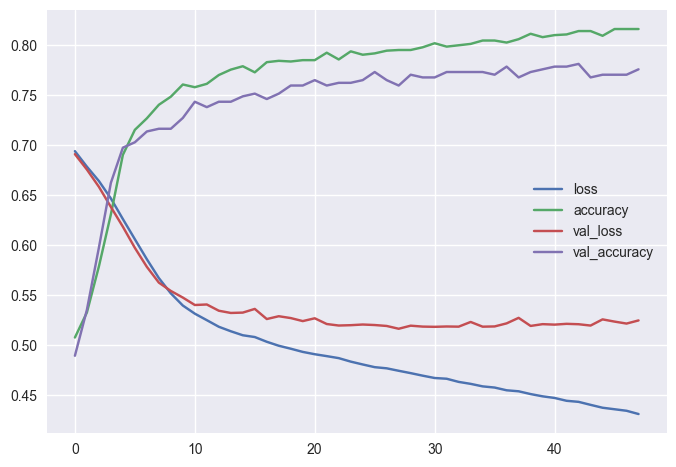

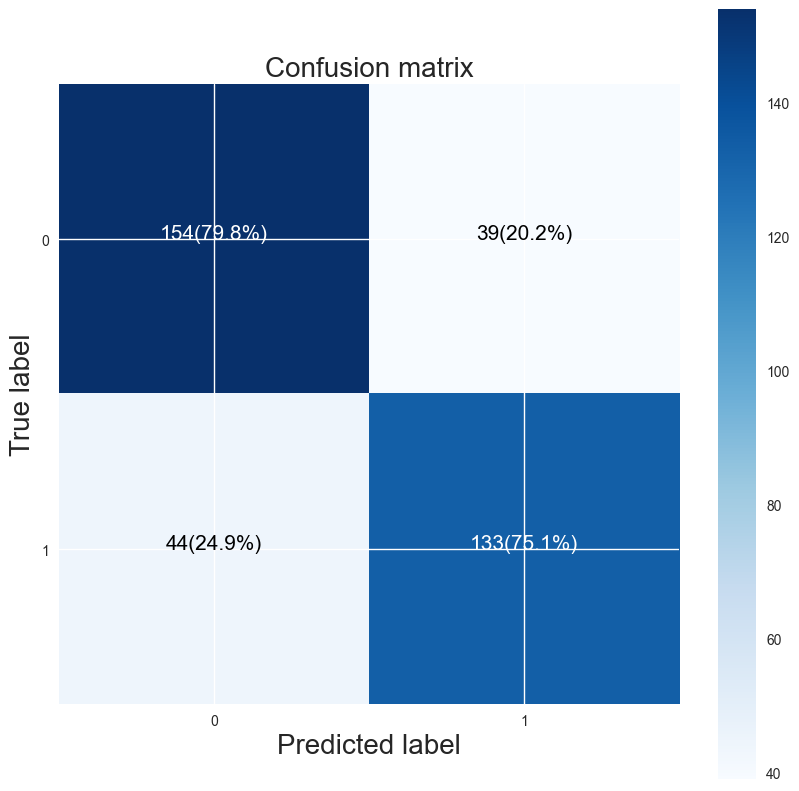

In [ ]:
model_evaluate(model_9, history_9, X_test_scaled_new=X_test_removed, y_test_new = y_test_removed)

In [ ]:
cob = X_train_removed.corr()
cob.style.background_gradient(cmap = 'coolwarm')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,23,25,27,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,1.000000,0.027938,0.112057,-0.000476,-0.036852,0.002905,-0.050147,-0.076633,-0.005676,0.073448,-0.025573,0.483617,0.006359,-0.037163,-0.208656,-0.030589,0.027808,0.193020,0.292637,0.218049,-0.060313,0.009583,0.151625,-0.048680,-0.173239,-0.082067,0.023813,0.070260,0.008750,0.035880,0.006565,-0.025071,0.012191,-0.133047,0.083736,0.125333,0.017070,0.004250,-0.026202,0.019422
1,0.027938,1.000000,0.059038,-0.030003,-0.084602,-0.041681,-0.030387,0.009133,-0.050155,0.035120,-0.001729,0.053104,-0.051542,-0.028726,0.041270,0.046041,-0.028668,-0.038017,0.036535,0.022716,-0.019581,0.006053,0.088386,-0.015947,-0.002734,0.244572,0.020555,0.035053,-0.307306,0.304570,-0.081655,-0.225226,0.005223,-0.173285,0.138826,0.119302,-0.067501,-0.023099,0.032483,-0.003336
2,0.112057,0.059038,1.000000,0.012936,-0.087536,-0.011100,-0.046717,-0.071731,-0.016100,0.001399,0.095088,0.110309,0.015354,-0.052538,-0.009578,-0.000543,-0.014503,-0.053002,0.043109,-0.016989,-0.081262,0.048598,0.111322,0.071111,-0.071447,-0.051153,0.002125,0.123140,-0.057319,-0.029879,0.022940,0.015675,0.007271,-0.093953,0.093268,0.029687,0.046596,-0.037451,0.004938,0.038973
3,-0.000476,-0.030003,0.012936,1.000000,0.056754,0.202336,-0.038203,0.053713,0.075689,0.015654,0.002728,-0.050843,-0.029377,-0.011188,0.016097,-0.031490,0.016737,-0.059631,0.050917,0.025763,-0.009480,0.035374,-0.061845,-0.001244,-0.170382,-0.077861,-0.040785,0.005426,0.094551,-0.055144,0.003298,0.011333,0.005457,0.098680,-0.001815,-0.052150,-0.068325,-0.002409,0.105179,-0.095001
4,-0.036852,-0.084602,-0.087536,0.056754,1.000000,-0.026484,0.009943,0.212768,0.022079,-0.038588,-0.144964,-0.047106,-0.036010,0.090089,-0.064529,-0.071289,0.010055,0.021122,0.023824,0.128593,0.128218,-0.061154,-0.427695,-0.035244,0.021038,0.035247,-0.082900,-0.017182,-0.009061,-0.024171,0.047274,-0.170947,-0.034090,0.474083,-0.291318,-0.075494,-0.177883,0.207474,0.030466,-0.269674
5,0.002905,-0.041681,-0.011100,0.202336,-0.026484,1.000000,-0.015651,0.023031,0.067114,0.000955,-0.032809,-0.016911,-0.028684,0.015408,0.002307,0.024449,-0.032979,0.008542,-0.015047,0.068896,-0.012229,-0.011705,-0.037499,-0.064103,-0.033772,-0.042582,0.016739,0.004295,0.021953,-0.013651,-0.028851,0.016722,0.013624,0.028321,0.012327,-0.044569,-0.017203,-0.062286,0.131173,-0.049522
6,-0.050147,-0.030387,-0.046717,-0.038203,0.009943,-0.015651,1.000000,-0.197989,-0.069072,-0.053394,-0.230997,-0.084890,-0.071516,-0.123914,-0.064819,-0.165078,-0.073888,0.078071,-0.097830,-0.114742,0.235487,-0.011187,0.001865,-0.015360,0.016748,-0.019258,0.020003,0.037783,0.036243,-0.003737,-0.000351,0.019275,0.051513,0.024708,-0.065917,-0.024910,-0.020809,-0.047990,0.031978,0.026089
7,-0.076633,0.009133,-0.071731,0.053713,0.212768,0.023031,-0.197989,1.000000,-0.085893,-0.066398,-0.287251,-0.105564,-0.088932,-0.154090,-0.080605,-0.205280,-0.091882,-0.061680,0.097153,0.337899,0.099864,-0.036118,-0.227313,-0.026013,0.005994,0.037926,-0.089747,-0.081322,0.016300,-0.043152,-0.046960,-0.088604,-0.044892,0.202302,-0.021626,-0.065028,-0.050945,0.094109,0.021886,-0.129823
8,-0.005676,-0.050155,-0.016100,0.075689,0.022079,0.067114,-0.069072,-0.085893,1.000000,-0.023164,-0.100212,-0.036828,-0.031025,-0.053757,-0.028120,-0.071615,-0.032055,0.002931,0.051293,-0.004307,-0.031676,0.014990,-0.049981,-0.023326,-0.011771,-0.001497,-0.038148,-0.009004,-0.000405,-0.015678,0.045211,0.016929,-0.015661,0.031450,0.028565,-0.041135,-0.037721,0.053783,-0.014014,-0.049531
9,0.073448,0.035120,0.001399,0.015654,-0.038588,0.000955,-0.053394,-0.066398,-0.023164,1.000000,-0.077467,-0.028469,-0.023983,-0.041556,-0.021738,-0.055361,-0.024779,0.034658,0.031904,0.043076,-0.029525,0.011587,0.046048,0.024130,-0.020453,-0.033308,-0.003679,-0.024516,-0.016692,-0.027764,-0.016449,-0.006373,-0.012107,-0.023255,0.035130,0.105490,0.020321,-0.007702,-0.000862,0.009761


In [ ]:
X_train_removed.drop([43], axis = 1, inplace = True)
X_test_removed.drop([43], axis = 1, inplace = True)

In [531]:
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    
    
   
    
    
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_9.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.00005),
                metrics = ['accuracy'])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 30 , min_delta=0.0001)


# Fit the model
history_9  = model_9.fit(X_train_removed,
                        y_train_removed,
                        epochs = 3000,
                        validation_data = (X_test_removed, y_test_removed),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 1s 7ms/step - loss: 0.6876 - accuracy: 0.5359 - val_loss: 0.6864 - val_accuracy: 0.5622
Epoch 2/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.6083 - val_loss: 0.6741 - val_accuracy: 0.6243
Epoch 3/3000
47/47 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.6563 - val_loss: 0.6630 - val_accuracy: 0.6459
Epoch 4/3000
47/47 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.6678 - val_loss: 0.6522 - val_accuracy: 0.6541
Epoch 5/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.6976 - val_loss: 0.6413 - val_accuracy: 0.6757
Epoch 6/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.7023 - val_loss: 0.6290 - val_accuracy: 0.7108
Epoch 7/3000
47/47 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0.7057 - val_loss: 0.6169 - val_accuracy: 0.7135
Epoch 8/3000
47/47 

12/12 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7811
Model prediction score is: 0.781% 



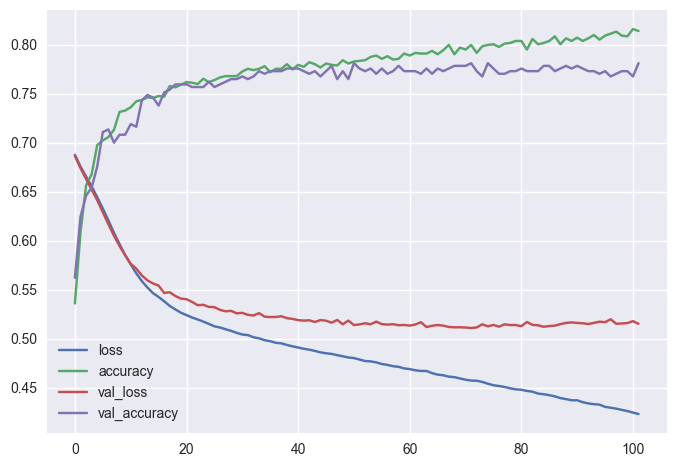

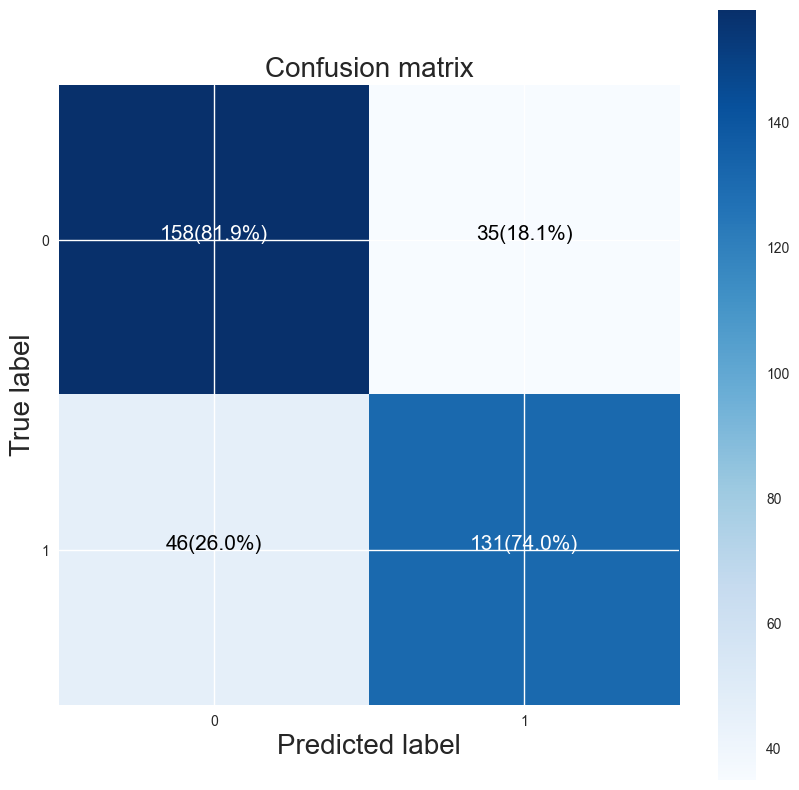

In [532]:
model_evaluate(model_9, history_9, X_test_scaled_new=X_test_removed, y_test_new = y_test_removed)



<AxesSubplot:>

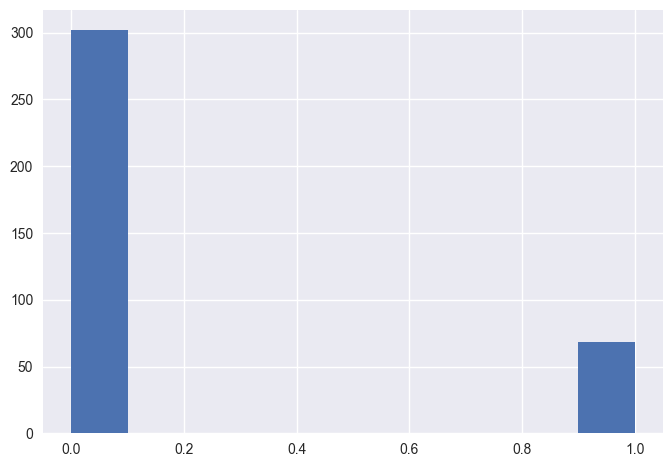

In [547]:
X_test_removed[7].hist()

KeyError: '1'